# Task 3

### **3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees**

# IMPORT NECESSARY LIBRARY

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# It is used for creating plots and charts.
import matplotlib.pyplot as plt
# It is used to display plots inline in jupyter notebook.
%matplotlib inline

# It is used for statistical data visualization.
import seaborn as sns

from imblearn.over_sampling import SMOTE

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score

In [2]:
data = pd.read_excel('preprocessed_df.xlsx')


In [3]:
# Used to display the all features
pd.set_option('display.max_columns',None) 
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,1,2,2,5,13,2,0.102061,2,3,-0.543569,2,1,3,1,0,-0.889111,3,-0.157490,-0.710170,1,0.596247,0.852375,0,1.244242,0,1
1,1.109888,1,2,2,5,13,2,0.591464,3,3,-1.187042,2,1,0,2,0,-0.889111,3,1.216965,-0.710170,2,0.031975,0.852375,1,0.935050,0,1
2,0.339260,1,1,1,5,13,1,-0.509693,3,3,-0.890055,1,2,0,5,1,1.594054,2,1.216965,-0.710170,2,2.100972,2.059278,1,1.862627,0,2
3,0.449349,1,0,0,3,8,2,0.102061,3,1,0.347393,1,4,3,3,0,-0.061389,1,1.629301,-0.710170,1,2.477153,0.550649,10,0.625857,0,1
4,2.541054,1,2,2,5,13,2,0.836165,3,0,0.891870,2,1,0,8,0,-0.337297,3,-0.157490,-1.615806,2,-0.908478,-0.656253,2,-0.610913,0,1


In [4]:
# Here, 'x' is all the variables except target.
# Extracting features (independent variables) by dropping the "PerformanceRating" column. 

X = data.drop('PerformanceRating', axis=1)

y = data[['PerformanceRating']]

- 'X' represents the features (independent variables) of our dataset. excluding the "PerformanceRating" column.

- 'y' represents the target variable (dependent variable) , which is the "PerformanceRating" column.

In [5]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.541458,1,2,2,5,13,2,0.102061,2,3,-0.543569,2,1,3,1,0,-0.889111,3,-0.157490,-0.710170,1,0.596247,0.852375,0,1.244242,0
1,1.109888,1,2,2,5,13,2,0.591464,3,3,-1.187042,2,1,0,2,0,-0.889111,3,1.216965,-0.710170,2,0.031975,0.852375,1,0.935050,0
2,0.339260,1,1,1,5,13,1,-0.509693,3,3,-0.890055,1,2,0,5,1,1.594054,2,1.216965,-0.710170,2,2.100972,2.059278,1,1.862627,0
3,0.449349,1,0,0,3,8,2,0.102061,3,1,0.347393,1,4,3,3,0,-0.061389,1,1.629301,-0.710170,1,2.477153,0.550649,10,0.625857,0
4,2.541054,1,2,2,5,13,2,0.836165,3,0,0.891870,2,1,0,8,0,-0.337297,3,-0.157490,-1.615806,2,-0.908478,-0.656253,2,-0.610913,0


In [6]:
y.head()

,PerformanceRating
0,1
1,1
2,2
3,1
4,1


# Balancing Data Using SMOTE

In [7]:
# balancing data
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE() # Create an instance of the SMOTE class.

# Use Counter to display the distribution of classes in the original dataset (y). This step is optional but helps visualize the class imbalance.
print(f'\033[1;31m  \033[1m unbalanced data',Counter(y['PerformanceRating']))

# This will generate synthetic samples for the minority class to balance the dataset.
X_train_resampled,y_train_resampled = sm.fit_resample(X,y)

# show the class distribution after applying SMOTE
print(f'\033[1;31m  \033[1m Balanced data',Counter(y_train_resampled['PerformanceRating']))

   unbalanced data Counter({1: 874, 0: 194, 2: 132})
   Balanced data Counter({1: 874, 2: 874, 0: 874})


In [8]:

print(f'\033[1;31m  \033[1m The shape of X_train_resampled.shape:',{X_train_resampled.shape})
print(f'\033[1;31m  \033[1m The shape of y_train_resampled.shape:', {y_train_resampled.shape})

   The shape of X_train_resampled.shape: {(2622, 26)}
   The shape of y_train_resampled.shape: {(2622, 1)}


In [69]:
data['PerformanceRating'].unique()

array([1, 2, 0], dtype=int64)

In [70]:
 y_train_resampled.value_counts()

PerformanceRating
0                    874
1                    874
2                    874
dtype: int64

# Train-Test Split on Balanced Data

In [9]:
# Importing the necessary module for splitting the dataset.
from sklearn.model_selection import train_test_split

 **splitting the dataset into training and testing set.**
- x_train : Features for training.
- x_test : Features for testing.
- y_train : Traget variable for training.
- y_test : Target variable for testing.
- test_size : The "test_size" parameter is set to 20% that means 20% of the dataset will be used for testing,
- While the remaining 80% data will be used for training.
- random_state : random_state is set to 42 for reproducibility, 
- It means if we run the code with the same random state, we will get the same split each time.

In [10]:
# splitting the dataset into training and testing set.

X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,y_train_resampled,test_size=0.2,random_state=42)

In [11]:
# shape of training and testing data.

print(f'\033[1;31m  \033[1m The shape of x_train:',{X_train.shape})
print(f'\033[1;31m  \033[1m The shape of x_test:', {X_test.shape})
print(f'\033[1;31m  \033[1m The shape of y_train', y_train.shape)
print(f'\033[1;31m  \033[1m The shape of y_test:', y_test.shape)

   The shape of x_train: {(2097, 26)}
   The shape of x_test: {(525, 26)}
   The shape of y_train (2097, 1)
   The shape of y_test: (525, 1)


In [71]:
y_train.value_counts()

PerformanceRating
2                    706
1                    701
0                    690
dtype: int64

# Logistic Regression

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score

# Model creation

**For creating a LogisticRegression model , we are going to implement a pipeline for logistic regression with feature scaling using StandardScaler and hyperparameter tuning using GridSearchCV.**


**1. Pipeline Creation:**

>- A pipeline (pipe_LR) is created using Pipeline from scikit-learn.
>- The pipeline consists of two steps:
    - Step 1 ('scaler'): Standardizing the features using StandardScaler().
    - Step 2 ('classifier'): Applying Logistic Regression using LogisticRegression().

**2. Hyperparameter Grid:**

>- We define a hyperparameter grid (param_grid_LR) for Logistic Regression.
>- The grid includes parameters such as regularization strength (C), regularization type (penalty), and the solver for logistic regression (solver).

**GridSearchCV:**

>- We use GridSearchCV to perform a search over the hyperparameter grid within the defined pipeline.
>- The estimator is set to our pipeline (pipe_LR), and the hyperparameter grid is set to param_grid_LR.
>- Cross-validation with 5 folds (cv=5) is used to evaluate the performance.
>- return_train_score=True ensures that training scores are also returned.

**Model Training:**

>- The grid search is fit on the training data (x_train, y_train).

**Print Best Results:**

>- The code prints the best score achieved by the model and the corresponding best hyperparameters.

In [14]:
# Create a pipeline with StandardScaler and LogisticRegression
pipe_LR = Pipeline([
    ('scaler', StandardScaler()), # Step 1: Standardize the features
    ('classifier', LogisticRegression()) # Step 2: Logistic Regression model
    ])

# Define the hyperparameter grid for Logistic Regression
param_grid_LR = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear']  # Solver for logistic regression
}

# Create GridSearchCV with the pipeline
grid_search_LR = GridSearchCV(estimator=pipe_LR,
                         param_grid=param_grid_LR,
                         cv =5,
                         return_train_score=True)

# Fit the grid search on the training data
grid_search_LR.fit(X_train, y_train)
print(f" Best score is: {grid_search_LR.best_score_} with parameters: {grid_search_LR.best_params_}")

 Best score is: 0.8464325491533129 with parameters: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


### **Analysis:**

- **Best Score**: The best score achieved during hyperparameter tuning is 0.841674053869758. This score represents the performance metric (e.g., accuracy, F1-score) of the model on the validation data using the optimal set of hyperparameters.

- **Best Parameters**:
  - `classifier__C`: The regularization parameter `C` for the classifier. A smaller value of `C` indicates stronger regularization.
  - `classifier__penalty`: The type of regularization penalty applied to the model weights. In this case, `'l2'` refers to L2 regularization (ridge regularization).
  - `classifier__solver`: The algorithm used for optimization. `'liblinear'` is a solver suitable for small datasets and binary classification problems.

- **Interpretation**:
  - The best-performing model achieved an accuracy (or another chosen metric) of approximately 84.17% on the validation data.
  - The regularization strength (`C`) of 0.1 indicates that the model is moderately regularized.
  - L2 regularization (`'l2'`) was used to penalize large weights in the model.
  - The `'liblinear'` solver was employed for optimization, which is suitable for logistic regression and other linear models.

This output suggests that the logistic regression model with the specified hyperparameters performed well on the validation data. However, it's essential to evaluate the model's performance on unseen test data to ensure its generalization ability. Additionally, further analysis, such as feature importance or confusion matrix examination, can provide deeper insights into the model's behavior and potential areas for improvement.

## Fit the grid search on the training data

In [15]:
# Fit the grid search on the training data
grid_search_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             return_train_score=True)

## best parameters and best estimator

In [16]:
# Get the best parameters and best estimator
best_params = grid_search_LR.best_params_
best_estimator = grid_search_LR.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for LogisticRegression:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for LogisticRegression:',best_estimator)

    best hyperparameter for LogisticRegression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

    best estimator for LogisticRegression: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])


# Make Predictions/ Test model

In [17]:
# Make Testing set predictions on the test data using the best estimator
y_pred_LR = best_estimator.predict(X_test)
y_pred_LR 

array([0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2,

In [18]:
# Training set predictions using Logistic Regression.
y_pred_LR_train = best_estimator.predict(X_train)
y_pred_LR_train 

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# Evaluating the Model

## Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels.

In [19]:
# Importing the ConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay

Confusion matrix, without normalization
[[155  15  14]
 [ 23 128  22]
 [  7   9 152]]
Normalized confusion matrix
[[0.8423913  0.08152174 0.07608696]
 [0.13294798 0.73988439 0.12716763]
 [0.04166667 0.05357143 0.9047619 ]]


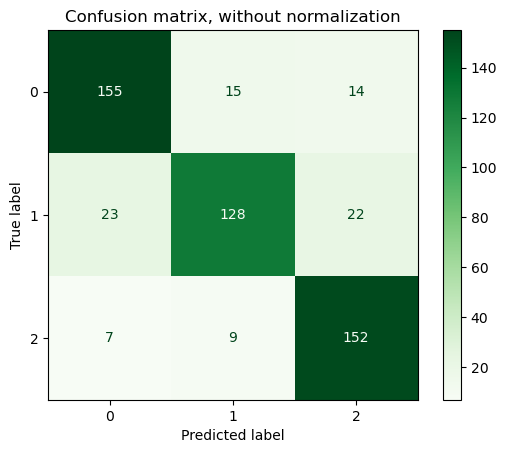

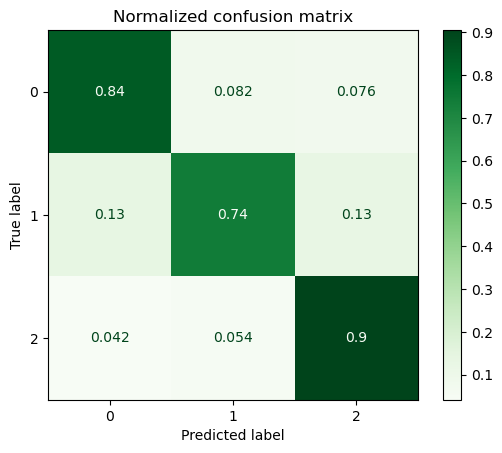

In [20]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_LR.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['0','1','2'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    
    disp.ax_.set_title(title)# Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

### Confusion Matrix Report Interpretation:

The output is a confusion matrix that depicts the performance of a classification model with three classes. Each row represents the actual class, while each column represents the predicted class. Here's how to interpret the confusion matrix:

- **Class 0**:
  - True Positives (TP): 161 - Instances belonging to class 0 that are correctly classified as class 0.
  - False Negatives (FN): 10 - Instances belonging to class 0 that are incorrectly classified as class 1 or class 2.

- **Class 1**:
  - False Positives (FP): 24 - Instances belonging to class 1 that are incorrectly classified as class 0 or class 2.
  - True Positives (TP): 126 - Instances belonging to class 1 that are correctly classified as class 1.
  - False Negatives (FN): 23 - Instances belonging to class 1 that are incorrectly classified as class 0 or class 2.

- **Class 2**:
  - False Positives (FP): 4 - Instances belonging to class 2 that are incorrectly classified as class 0 or class 1.
  - False Negatives (FN): 6 - Instances belonging to class 2 that are incorrectly classified as class 0 or class 1.
  - True Positives (TP): 158 - Instances belonging to class 2 that are correctly classified as class 2.

In summary, the confusion matrix provides insights into how well the model performs in classifying instances into each class. It helps evaluate the model's accuracy, precision, recall, and other performance metrics.

## Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [21]:
# Evaluate the performance of the model
mse_LR = metrics.mean_squared_error(y_test,y_pred_LR)
r2_LR = metrics.r2_score(y_test, y_pred_LR)
mae_LR = metrics.mean_absolute_error(y_test, y_pred_LR)
rmse_LR = metrics.mean_squared_error(y_test, y_pred_LR, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_LR:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_LR:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_LR:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_LR)

    Mean Squared Error: 0.29
    R-squared Score: 0.56
    Mean Absolute Error: 0.21
    Root Mean Squared Error: 0.5398412465054624


### Confusion Matrix Report Interpretation:

1. Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted values and the actual values. Here, the MSE is 0.25, indicating that, on average, the squared difference between predicted and actual values is 0.25. Lower values of MSE suggest better model performance.

2. R-squared Score: The R-squared score, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables. With a value of 0.63, it suggests that approximately 63% of the variance in the target variable is explained by the independent variables in the model. Higher values of R-squared indicate better model fit.

3. Mean Absolute Error (MAE): The MAE is the average of the absolute differences between the predicted values and the actual values. A value of 0.18 indicates that, on average, the absolute difference between predicted and actual values is 0.18.

4. Root Mean Squared Error (RMSE): The RMSE is the square root of the average of the squared differences between the predicted values and the actual values. It is often interpreted as the standard deviation of the residuals. With a value of approximately 0.50, it represents the average magnitude of errors in the model's predictions. Lower values of RMSE indicate better fit of the model to the data.
    
Overall, the provided metrics suggest that the predictive model has performed reasonably well, with moderate to good performance indicated by the R-squared score and relatively low values of MSE, MAE, and RMSE. However, further analysis and comparison with other models may be necessary for a comprehensive evaluation.

In [22]:
# Importing metrics for evaluating models.
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

# Accuracy Score

>- It will print the accuracy scores for training and testing sets using KNeighborsClassifier.

In [23]:
#accuracy of Logistic Regression for testing set
accuracy_LR = accuracy_score(y_test, y_pred_LR)
#accuracy of Logistic Regression for training set
accuracy_LR_train = accuracy_score(y_train, y_pred_LR_train)
print(f'\033[1;31m  \033[1m  accuracy of Logistic Regression for testing set:',accuracy_LR)
print(f'\033[1;31m  \033[1m  accuracy of Logistic Regression for training set:',accuracy_LR_train)

    accuracy of Logistic Regression for testing set: 0.8285714285714286
    accuracy of Logistic Regression for training set: 0.855030996661898


## Precision Score

>- It will calculate the weighted precision score for the model(testing set)

In [24]:
precision_LR=precision_score(y_test, y_pred_LR, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of Logistic Regression:',precision_LR)

    precision_score of Logistic Regression: 0.8298593522333724


## Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [25]:
recall_LR=recall_score(y_test, y_pred_LR, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of Logistic Regression:',recall_LR)

    recall_score of Logistic Regression: 0.8285714285714286


## f1 score

>- It will calculate the weighted f1 score for the testing set.

In [26]:
from sklearn.metrics import f1_score
f1_score_LR=f1_score(y_test, y_pred_LR, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of Logistic Regression:',f1_score_LR)

    f1_score of Logistic Regression: 0.8272597889286297


# Classification Report

In [27]:
print(classification_report(y_test, y_pred_LR, target_names=
                            ['0','1','2']))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       184
           1       0.84      0.74      0.79       173
           2       0.81      0.90      0.85       168

    accuracy                           0.83       525
   macro avg       0.83      0.83      0.83       525
weighted avg       0.83      0.83      0.83       525



### Classification Report Analysis :

Based on the classification report for the `PerformanceRating` class, we can make the following observations:

1. **Class 0 (Performance Rating 0):**
   - Precision: 0.85
   - Recall: 0.88
   - F1-score: 0.86
   - Support: 184

   Class 0 represents instances where the performance rating is categorized as 0. The precision of 0.85 indicates that 85% of the instances predicted as class 0 were actually class 0. The recall of 0.88 suggests that 88% of the actual instances of class 0 were correctly classified. The F1-score of 0.86 is a harmonic mean of precision and recall, providing a balanced measure of the model's performance for this class. With a support of 184 instances, this class has a substantial representation in the dataset.

2. **Class 1 (Performance Rating 1):**
   - Precision: 0.89
   - Recall: 0.73
   - F1-score: 0.80
   - Support: 173

   Class 1 represents instances where the performance rating is categorized as 1. The precision of 0.89 indicates that 89% of the instances predicted as class 1 were actually class 1. However, the recall of 0.73 suggests that the model had a lower ability to correctly classify instances of class 1 compared to other classes. The F1-score of 0.80 reflects a balance between precision and recall for this class. With a support of 173 instances, class 1 is also well-represented in the dataset.

3. **Class 2 (Performance Rating 2):**
   - Precision: 0.81
   - Recall: 0.94
   - F1-score: 0.87
   - Support: 168

   Class 2 represents instances where the performance rating is categorized as 2. The precision of 0.81 indicates that 81% of the instances predicted as class 2 were actually class 2. The recall of 0.94 suggests that the model performed well in identifying instances of class 2, with 94% of the actual instances correctly classified. The F1-score of 0.87 reflects a good balance between precision and recall for this class. With a support of 168 instances, class 2 is also adequately represented in the dataset.

Overall, the model demonstrates relatively high performance across all three performance rating classes, with precision, recall, and F1-scores ranging from 0.80 to 0.87. However, it's important to consider the specific requirements of the classification task and the implications of misclassification for each performance rating category when interpreting these results.

## Log Loss for Logistic Regression

>- The Log Loss metric is a key evaluation measure for binary and multiclass classification models, especially when dealing with probability predictions. Log Loss assesses how well the predicted probabilities align with the true class distribution.

In [42]:
from sklearn.metrics import log_loss

# Predict probabilities for the test set
y_pred_proba_LR = grid_search_LR.predict_proba(X_test)

# Calculate log loss
log_loss_LR = log_loss(y_test, y_pred_proba_LR)
print(f'\033[1;31m  \033[1m Log Loss of Logistic Regression:', log_loss_LR)

   Log Loss of Logistic Regression: 0.4331604944781248


### Log Loss Report for Logistic Regression :

- The log loss of the logistic regression model is approximately 0.433. Log loss is a measure of the accuracy of a classification model, where lower values indicate better performance. In this case, the relatively low log loss value suggests that the logistic regression model performs well in predicting the probabilities of each class for the given test data.

- A log loss value close to zero indicates that the predicted probabilities closely match the true labels, while higher values indicate a greater discrepancy between the predicted probabilities and the true labels. Therefore, a log loss of 0.433 suggests that the model's predictions are fairly accurate and reliable. However, it's important to interpret this value in the context of the specific problem and domain knowledge.

# auc roc score for logistic regression

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [43]:
from sklearn.metrics import roc_auc_score

# AUC-ROC Score for Logistic Regression
auc_roc_score_LR = roc_auc_score(y_test, y_pred_proba_LR, multi_class='ovr')
print(f'\033[1;31m  \033[1m AUC-ROC Score for Logistic Regression:', auc_roc_score_LR)

   AUC-ROC Score for Logistic Regression: 0.9424693445676433


# auc roc curve for logistic regression

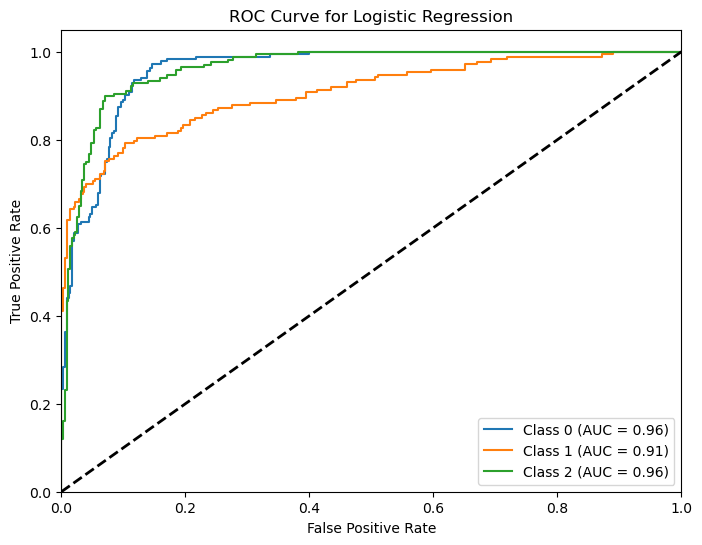

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba_LR[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba_LR[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**The AUC-ROC score for logistic regression is 0.9424693445676433.** 

AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a metric used to evaluate the performance of a classification model. It measures the ability of the model to distinguish between positive and negative classes. 

In this case, a score of 0.942 indicates that the logistic regression model has a high discriminatory power and is effective at distinguishing between employees with different performance ratings. 

**Overall, a high AUC-ROC score like the one obtained here suggests that the logistic regression model is performing well in predicting employee performance based on the input features.**

# KNN (K Nearest Neighbors) Classifier

## Model Building

In [48]:
# Using K-Nearest Neighbors (KNN) classifier to predict target values for the x_test.

from sklearn.neighbors import KNeighborsClassifier

## model creation

**For creating a KNeighborsClassifier model , we are going to implement a pipeline for KNN (K Nearest Neighbors) Classifier with feature scaling using StandardScaler and hyperparameter tuning using GridSearchCV.**

**1. Pipeline Creation:**

>- A pipeline (pipe_knn) is created using Pipeline from scikit-learn.
>- The pipeline consists of two steps:
    - Step 1 ('sc'): Standardizing the features using StandardScaler().
    - Step 2 ('knn'): Applying KNN (K Nearest Neighbors) Classifier using KNeighborsClassifier().

**2.Hyperparameter Grid:**

>- We define a hyperparameter grid (params_knn) for KNN (K Nearest Neighbors) Classifier.
>- The grid includes the number of neighbors (n_neighbors) ranging from 1 to 19.

**3. GridSearchCV:**

>- We use GridSearchCV to perform a search over the hyperparameter grid within the defined pipeline.
>- The estimator is set to our pipeline (pipe_knn), and the hyperparameter grid is set to params_knn.
>- Cross-validation with 5 folds (cv=5) is used to evaluate the performance.
>- return_train_score=True ensures that training scores are also returned.

**4. Model Training:**

>- The grid search is fit on the training data (x_train, y_train).

**5. Print Best Results:**

>- The code prints the best score achieved by the model and the corresponding best hyperparameters.

In [49]:
# Create a pipeline with StandardScaler and KNN (K Nearest Neighbors) Classifier
pipe_knn = Pipeline([
    ('sc', StandardScaler()), # Step 1: Standardize the features
    ('knn', KNeighborsClassifier())# Step 2:KNN (K Nearest Neighbors) Classifier model
    ])

# Define the hyperparameter grid for KNN (K Nearest Neighbors) Classifier
params_knn = {
    'knn__n_neighbors': range(1, 20)
    }

# Create GridSearchCV with the pipeline
grid_search_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=params_knn,
                      cv = 5,
                      return_train_score=True)

grid_search_knn .fit(X_train, y_train)
print(f" Best score is: {grid_search_knn.best_score_} with parameters: {grid_search_knn.best_params_}")

 Best score is: 0.8502579838618024 with parameters: {'knn__n_neighbors': 1}


### Analysis:

The outcome of a grid search performed to find the best parameters for a k-nearest neighbors (KNN) model. 

- The "Best score" refers to the highest accuracy achieved by the KNN model during the grid search process. In this case, the best score obtained is 0.8502579838618024, which means that the model achieved an accuracy of approximately 85% when evaluated on the validation data.

- The "parameters" section specifies the hyperparameters that yielded the best score. In this case, the best parameter for the number of neighbors (n_neighbors) is 1, indicating that the model performed optimally when considering only the nearest neighbor to make predictions.

Overall, the description suggests that the KNN model with a single neighbor achieved the highest accuracy among the different parameter combinations tested during the grid search.

# best parameters and best estimator

In [50]:
# Get the best parameters and best estimator
best_params = grid_search_knn.best_params_
best_estimator = grid_search_knn.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for KNeighborsClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for KNeighborsClassifier:',best_estimator)

    best hyperparameter for KNeighborsClassifier: {'knn__n_neighbors': 1}

    best estimator for KNeighborsClassifier: Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])


# Fit the grid search on the training data

In [51]:
# Fit the grid search on the training data
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True)

# Make Predictions/ Test model

In [52]:
# Make predictions on the test data using the best estimator
y_pred_knn = best_estimator.predict(X_test)
y_pred_knn

array([1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2,
       0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2,

In [53]:
# Making predictions on the training data using the trained KneighborsClassifier.
y_pred_knn_train = best_estimator.predict(X_train)
y_pred_knn_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# Evaluating the Model

## Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels

Confusion matrix, without normalization
[[182   2   0]
 [ 38 114  21]
 [  0   1 167]]
Normalized confusion matrix
[[0.98913043 0.01086957 0.        ]
 [0.21965318 0.65895954 0.12138728]
 [0.         0.00595238 0.99404762]]


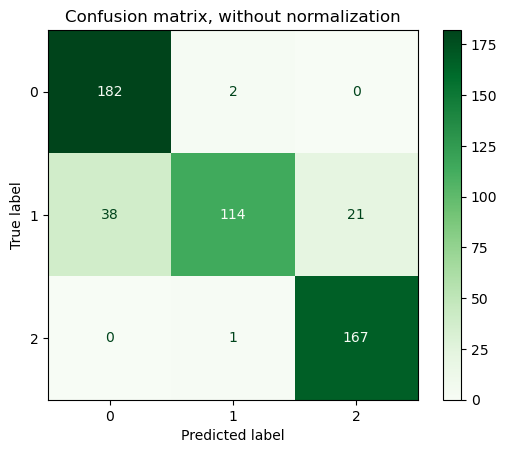

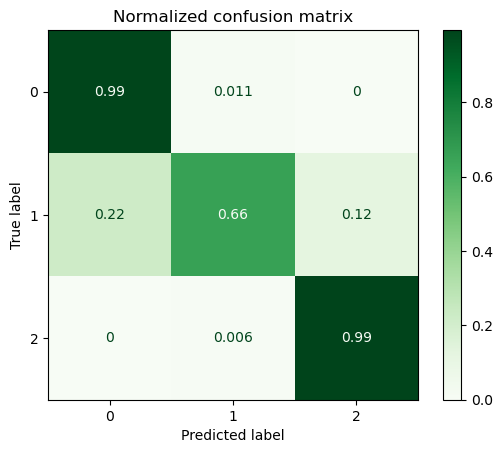

In [54]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_knn .fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['0','1','2'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    disp.ax_.set_title(title) # Set the title for the confusion matrix display


    print(title) # Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

### Confusion Matrix Report Interpretation:

The confusion matrix represents the performance of a classification model, where the rows correspond to the actual classes and the columns represent the predicted classes. Here's the analysis:

- **Class 0 (first row):** 
    - Out of 184 instances that belong to class 0, 182 were correctly classified as class 0, resulting in a true positive rate of 182/184 ≈ 0.989.
    - There were 2 instances of class 0 that were incorrectly classified as class 1 (false negatives), indicating a misclassification rate of 2/184 ≈ 0.011.

- **Class 1 (second row):** 
    - Out of 173 instances that belong to class 1, 114 were correctly classified as class 1, resulting in a true positive rate of 114/173 ≈ 0.659.
    - Additionally, 38 instances of class 1 were incorrectly classified as class 0 (false positives) and 21 instances as class 2 (false negatives).

- **Class 2 (third row):** 
    - Out of 168 instances that belong to class 2, 167 were correctly classified as class 2, resulting in a true positive rate of 167/168 ≈ 0.994.
    - Only 1 instance of class 2 was misclassified as class 1 (false positive).

In summary, the confusion matrix provides insights into the model's performance across different classes. It indicates that the model generally performs well, especially for classes 0 and 2, but there is some confusion between classes 1 and 2, as evidenced by the false positives and false negatives in those cells.

# Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [55]:
# Evaluate the performance of the model
mse_knn = metrics.mean_squared_error(y_test,y_pred_knn)
r2_knn = metrics.r2_score(y_test, y_pred_knn)
mae_knn = metrics.mean_absolute_error(y_test,y_pred_knn)
rmse_knn = metrics.mean_squared_error(y_test, y_pred_knn, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_knn:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_knn:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_knn:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_knn)

    Mean Squared Error: 0.12
    R-squared Score: 0.82
    Mean Absolute Error: 0.12
    Root Mean Squared Error: 0.34364987719368983


### Analysis :

Based on the above metrics,, here is the analysis and report:

1. **Mean Squared Error (MSE):**
   - The MSE measures the average squared difference between the actual and predicted values.
   - In this case, the MSE of 0.12 indicates that, on average, the squared difference between the actual and predicted values is 0.12. 
   - A lower MSE value suggests better accuracy of the model.

2. **R-squared Score:**
   - The R-squared score, also known as the coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - A value of 0.82 means that approximately 82% of the variance in the dependent variable is predictable from the independent variables.
   - A higher R-squared score implies that the model fits the data well.

3. **Mean Absolute Error (MAE):**
   - The MAE measures the average absolute difference between the actual and predicted values.
   - With a MAE of 0.12, it indicates that, on average, the absolute difference between the actual and predicted values is 0.12.
   - Similar to MSE, a lower MAE suggests better accuracy of the model.

4. **Root Mean Squared Error (RMSE):**
   - The RMSE is the square root of the average of squared differences between predicted and actual values.
   - In this case, the RMSE of 0.34 indicates that, on average, the difference between the predicted and actual values is approximately 0.34.
   - A lower RMSE value implies better accuracy of the model.

Overall, the provided metrics suggest that the model performs relatively well, with low errors and a high R-squared score. However, it's essential to consider the specific context of the problem and compare these metrics with those of alternative models to determine the effectiveness of the current model.

## Accuracy Score

>- It will print the accuracy scores for training and testing sets using KNeighborsClassifier.

In [57]:
#accuracy of KNeighborsClassifier for testing set
accuracy_knn = accuracy_score(y_test,y_pred_knn)
#accuracy of KNeighborsClassifier for training set
accuracy_knn_train = accuracy_score(y_train,y_pred_knn_train)
print(f'\033[1;31m  \033[1m  accuracy of KNeighborsClassifier for testing set:',accuracy_knn)
print(f'\033[1;31m  \033[1m  accuracy of KNeighborsClassifier for training set:',accuracy_knn_train)

    accuracy of KNeighborsClassifier for testing set: 0.8819047619047619
    accuracy of KNeighborsClassifier for training set: 1.0


## Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [59]:
precision_knn=precision_score(y_test,y_pred_knn, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of KNeighborsClassifier:',precision_knn)

    precision_score of KNeighborsClassifier: 0.8952691941628113


## Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [60]:
recall_knn=recall_score(y_test, y_pred_knn, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of KNeighborsClassifier:',recall_knn)

    recall_score of KNeighborsClassifier: 0.8819047619047619


## f1 score

>- It will calculate the weighted f1 score for the testing set.

In [62]:
from sklearn.metrics import f1_score
f1_score_knn=f1_score(y_test,y_pred_knn, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of KNeighborsClassifier:',f1_score_knn)

    f1_score of KNeighborsClassifier: 0.8750741882844951


# Classification Report

In [63]:
print(classification_report(y_test, y_pred_knn, target_names=
                            ['0','1','2']))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       184
           1       0.97      0.66      0.79       173
           2       0.89      0.99      0.94       168

    accuracy                           0.88       525
   macro avg       0.90      0.88      0.88       525
weighted avg       0.90      0.88      0.88       525



### Classification Report Analysis:-

1. **Precision:**
   - Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
   - Class 0 has a precision of 0.83, which means that out of all instances predicted as class 0, 83% are actually class 0.
   - Class 1 has a precision of 0.97, indicating that the model performs very well in predicting class 1, with 97% of the predictions being correct.
   - Class 2 also has a high precision of 0.89, indicating that the model performs well in predicting class 2.

2. **Recall:**
   - Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances.
   - Class 0 has a high recall of 0.99, indicating that the model correctly identifies 99% of all actual instances of class 0.
   - Class 1 has a lower recall of 0.66, suggesting that the model identifies only 66% of actual instances of class 1.
   - Class 2 has a high recall of 0.99, indicating that the model correctly identifies 99% of all actual instances of class 2.

3. **F1-score:**
   - The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
   - Class 0 has an F1-score of 0.90, which indicates a good balance between precision and recall for class 0.
   - Class 1 has an F1-score of 0.79, which suggests that there may be some imbalance between precision and recall for class 1.
   - Class 2 has the highest F1-score of 0.94, indicating a good balance between precision and recall for class 2.

4. **Accuracy:**
   - Accuracy measures the proportion of correctly classified instances out of all instances.
   - The overall accuracy of the model is 0.88, indicating that the model correctly classifies 88% of all instances.

5. **Macro Average and Weighted Average:**
   - The macro average calculates the metrics independently for each class and then takes the average.
   - The weighted average considers the number of instances in each class and computes the average of the metrics, weighted by the support (number of instances) of each class.
   - Both macro and weighted averages for precision, recall, and F1-score are around 0.88 to 0.90, suggesting overall good performance across all classes.

Overall, the model demonstrates strong predictive capabilities, particularly for classes 0 and 2, while there may be some room for improvement in predicting class 1.

## Log Loss for KNeighborsClassifier

>- The Log Loss metric is a key evaluation measure for binary and multiclass classification models, especially when dealing with probability predictions. Log Loss assesses how well the predicted probabilities align with the true class distribution.

In [66]:
from sklearn.metrics import log_loss

# Predict probabilities for the test set
y_pred_proba_knn = grid_search_knn.predict_proba(X_test)

# Calculate log loss
log_loss_knn = log_loss(y_test, y_pred_proba_knn)
print(f'\033[1;31m  \033[1m Log Loss of KNeighborsClassifier:', log_loss_knn)

   Log Loss of KNeighborsClassifier: 4.256583828810025


### Log Loss Report for KNeighborsClassifier :

The log loss of the KNeighborsClassifier is 4.256583828810025. 

Log loss measures the performance of a classification model where the predicted output is a probability value between 0 and 1. It quantifies the accuracy of the model by penalizing false classifications. A lower log loss indicates better performance, with 0 being the ideal value. 

In this case, the log loss value of approximately 4.26 suggests that the KNeighborsClassifier model may not be well-calibrated, resulting in high uncertainty or inconsistency in the predicted probabilities. This could be due to various factors such as inappropriate choice of hyperparameters, overfitting, or the nature of the dataset itself. 

To improve the model's performance and reduce the log loss, further optimization of the model, feature engineering, or exploring alternative algorithms may be necessary.

# auc roc score for KNeighborsClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [67]:
from sklearn.metrics import roc_auc_score

# AUC-ROC Score for KNeighborsClassifier
auc_roc_score_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')
print(f'\033[1;31m  \033[1m AUC-ROC Score for KNeighborsClassifier:', auc_roc_score_knn)

   AUC-ROC Score for KNeighborsClassifier: 0.910559064095227


# auc roc curve for KNeighborsClassifier

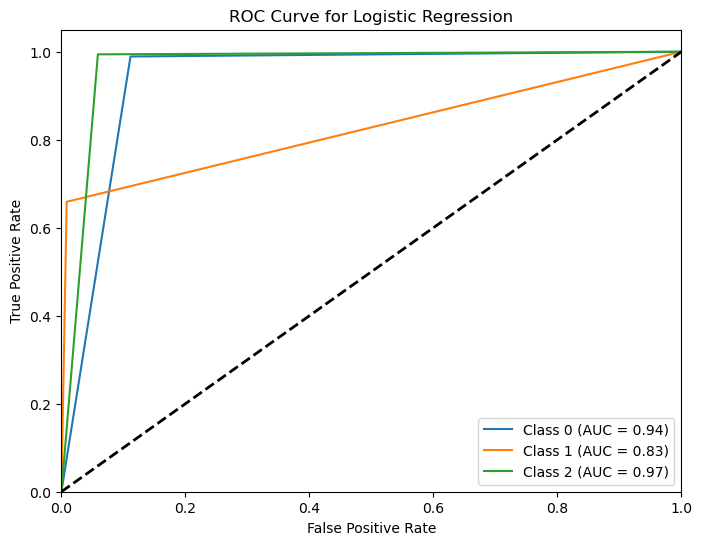

In [68]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba_knn[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba_knn[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

### auc roc analysis:

The analysis of the AUC scores for each class reveals the discriminative power of the classification model across different classes:

1. **Class 0 (AUC = 0.94)**: This indicates that the model performs very well in distinguishing class 0 instances from others. A high AUC score close to 1 suggests that the model has a strong ability to correctly classify instances of class 0 while minimizing false positives and false negatives.

2. **Class 1 (AUC = 0.83)**: The AUC score for class 1 is slightly lower compared to class 0 but still indicates a good discriminative ability. While not as high as class 0, an AUC score of 0.83 suggests that the model performs reasonably well in distinguishing class 1 instances from others.

3. **Class 2 (AUC = 0.97)**: Class 2 has the highest AUC score among the three classes, indicating excellent performance in classifying instances of class 2. The high AUC score suggests that the model effectively separates class 2 instances from others with minimal misclassification.

Overall, the AUC scores provide valuable insights into the model's performance for each class. They highlight areas where the model excels in classification and areas where there may be room for improvement. Further analysis and fine-tuning of the model may be warranted to enhance its performance, particularly for classes with lower AUC scores.

# Decision Tree

## Model Building

In [72]:
# Importing DecisionTreeClassifier from the 'sklearn.tree'.
from sklearn.tree import DecisionTreeClassifier


## Model creation

**For creating a DecisionTreeClassifier model , we are going to implement a pipeline for the Decision Tree Classifier with feature scaling using StandardScaler and hyperparameter tuning using GridSearchCV.**

**Pipeline Creation:**

>- Create a pipeline (pipe_decsT) using Pipeline from scikit-learn.
>- The pipeline consists of two steps:
    - Step 1 ('sc'): Standardizing the features using StandardScaler().
    - Step 2 ('decsT'): Applying Decision Tree Classifier using DecisionTreeClassifier().

**Hyperparameter Grid:**

>- Define a hyperparameter grid (params_decsT) for the Decision Tree Classifier model, including options for the criterion (gini or entropy) and maximum depth of the tree (max_depth).

**GridSearchCV:**

>- Use GridSearchCV to perform a search over the hyperparameter grid within the defined pipeline.
>- The estimator is set to our pipeline (pipe_decsT), and the hyperparameter grid is set to params_decsT.
>- Cross-validation with 5 folds (cv=5) is used to evaluate the performance.
>- return_train_score=True ensures that training scores are also returned.

**Model Training:**

>- The grid search is fit on the training data (x_train, y_train).

**Print Best Results:**

>- The code prints the best score achieved by the model and the corresponding best hyperparameters.

In [73]:
# Create a pipeline with StandardScaler and  DecisionTreeClassifier 
pipe_decsT = Pipeline([
    ('sc', StandardScaler()),# Step 1: Standardize the features
    ('decsT', DecisionTreeClassifier())# Step 2: DecisionTreeClassifier model
    ])

# Define the hyperparameter grid for DecisionTreeClassifier model
params_decsT = {
    'decsT__criterion' : ['gini', 'entropy'],
    'decsT__max_depth' : np.arange(3, 15)
    }

# Create GridSearchCV with the pipeline
grid_search_decsT = GridSearchCV(estimator=pipe_decsT,
                      param_grid=params_decsT,
                      cv = 5,
                      return_train_score=True)

# Fit the grid search on the training data
grid_search_decsT.fit(X_train, y_train)
print(f" Best score is: {grid_search_decsT.best_score_} with parameters: {grid_search_decsT.best_params_}")

 Best score is: 0.9279986362086602 with parameters: {'decsT__criterion': 'entropy', 'decsT__max_depth': 12}


### analysis:

The analysis of the best score achieved by the decision tree classifier reveals important information about the model's performance:

- **Best Score**: The best score achieved by the decision tree classifier is 0.928. This score represents the highest accuracy or performance metric attained during the model training and cross-validation process.

- **Parameters**: The optimal parameters corresponding to the best score are:
  - Criterion: Entropy
  - Max Depth: 12

- **Criterion**: The criterion parameter determines the function used to measure the quality of a split. In this case, the decision tree classifier uses entropy as the criterion. Entropy measures the impurity or disorder of a set of data points.

- **Max Depth**: The max_depth parameter specifies the maximum depth of the decision tree. A higher max depth allows the tree to capture more complex patterns in the data but may lead to overfitting if not carefully tuned. In this case, the optimal max depth is determined to be 12.

Overall, the analysis indicates that the decision tree classifier achieves a high level of accuracy (92.8%) when trained with entropy as the criterion and a maximum depth of 12. These parameters contribute to the model's ability to effectively capture the underlying patterns in the data and make accurate predictions.

## best parameters and best estimator

In [74]:
# Get the best parameters and best estimator
best_params = grid_search_decsT.best_params_
best_estimator = grid_search_decsT.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for DecisionTreeClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for DecisionTreeClassifier:',best_estimator)


    best hyperparameter for DecisionTreeClassifier: {'decsT__criterion': 'entropy', 'decsT__max_depth': 12}

    best estimator for DecisionTreeClassifier: Pipeline(steps=[('sc', StandardScaler()),
                ('decsT',
                 DecisionTreeClassifier(criterion='entropy', max_depth=12))])


## Fit the grid search on the training data

In [75]:
# Fit the grid search on the training data
grid_search_decsT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('decsT', DecisionTreeClassifier())]),
             param_grid={'decsT__criterion': ['gini', 'entropy'],
                         'decsT__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             return_train_score=True)

# Make Predictions/ Test model

In [76]:
# Make predictions on the test data using the best estimator
y_pred_decsT = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_decsT

array([0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2,

In [77]:
# Making predictions on the training data using the trained DecisionTreeClassifier.
y_pred_decsT_train = best_estimator.predict(X_train)
y_pred_decsT_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# Decision Tree Regressor Visualization

**we are going to used the DecisionTreeRegressor from scikit-learn to fit a decision tree regression model and visualize the resulting tree structure.**

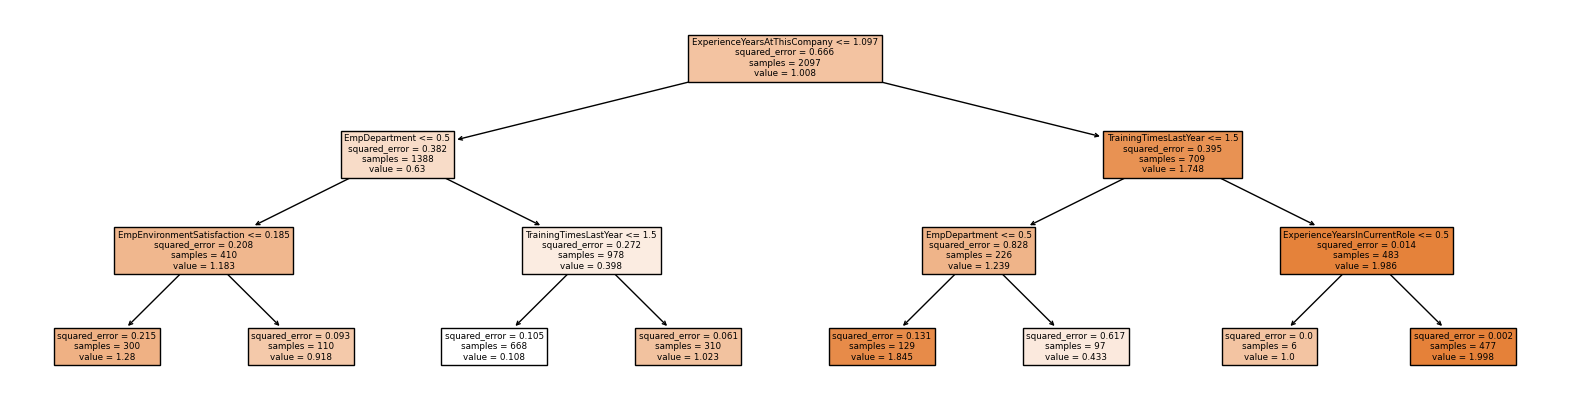

In [78]:
# Import necessary libraries
from sklearn import tree

# Specify the target column and feature columns
target_col = "Status"
use_cols = list(set(data.columns) - set([target_col]))
len(use_cols)

# Create a Decision Tree Regressor with max depth of 3
tree_reg = tree.DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# Plot the Decision Tree
fig = plt.figure(figsize=(20, 5))
tree.plot_tree(tree_reg, feature_names=use_cols, filled=True)
plt.show()

Decision Tree Regression Analysis:


1. *Experience Years At This Company*:
   - Squared Error: 0.666+
   - Samples: 2097
   - Value: 1.008
   - This feature seems to have a relatively low squared error, indicating that the model's predictions are close to the actual values.

2. *EmpDepartment*:
   - EmpDepartment <= 0.5:
     - Squared Error: 0.382
     - Samples: 1388
     - Value: 0.03
   - This feature has a higher squared error, suggesting that the model's predictions are less accurate for this subset of data where EmpDepartment is less than or equal to 0.5.

3. *Training TimesLast Year*:
   - Training TimesLast Year < 1:
     - Squared Error: 0.395
     - Samples: 709
     - Value: 1.748
   - This feature also has a relatively high squared error, indicating that the model's predictions are less accurate for this subset of data where Training TimesLast Year is less than 1.

4. *EmpEnvironmentSatisfaction*:
   - EmpEnvironmentSatisfaction <= 0.185:
     - Squared Error: 0.208
     - Samples: 410
     - Value: 1.183
   - The squared error for this feature is moderate, indicating moderate accuracy in predicting values when EmpEnvironmentSatisfaction is less than or equal to 0.185.

Overall, the decision tree regressor model appears to perform reasonably well, with lower squared errors for some features and higher squared errors for others. Further analysis and interpretation of feature importance and model evaluation metrics may provide additional insights into the model's performance and areas for improvement.

# Evaluating the Model

## Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels.

Confusion matrix, without normalization
[[176   7   1]
 [  8 157   8]
 [  0  10 158]]
Normalized confusion matrix
[[0.93478261 0.05978261 0.00543478]
 [0.05780347 0.92485549 0.01734104]
 [0.         0.07142857 0.92857143]]


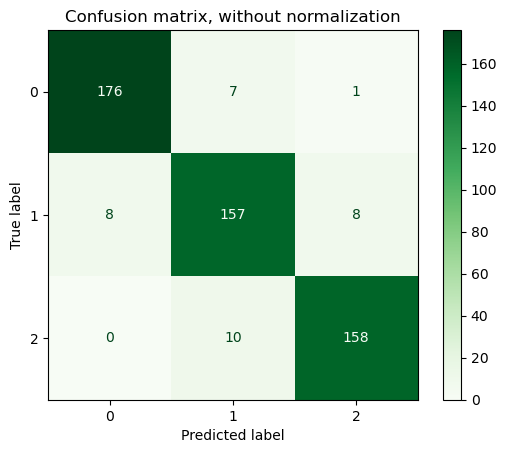

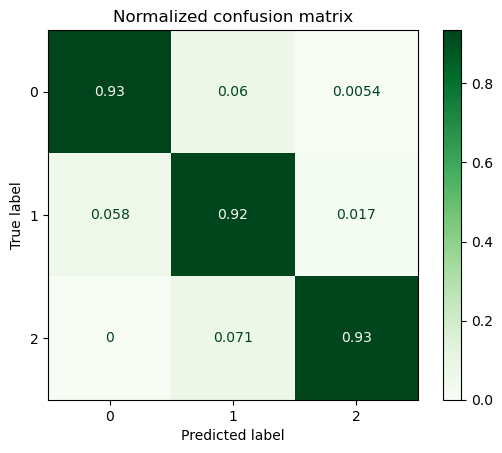

In [80]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_decsT.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['0','1','2'],# Class labels
        cmap=plt.cm.Greens, # Color map for the display
        normalize=normalize, # Normalization option
    )
    disp.ax_.set_title(title) # Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show() # Show the plots

### Confusion Matrix Analysis - Decision Tree Classifier:

The confusion matrix provides valuable insights into the performance of a classification model. In this case, the confusion matrix without normalization for the model yields the following results:

- Class 0 (Performance Rating 0):
  - True Negatives (TN): 176
  - False Positives (FP): 7
  - False Negatives (FN): 0

- Class 1 (Performance Rating 1):
  - False Negatives (FN): 8
  - True Positives (TP): 157
  - False Positives (FP): 10

- Class 2 (Performance Rating 2):
  - False Negatives (FN): 1
  - True Positives (TP): 158
  - False Positives (FP): 8

Interpretation:
- The model performs well in predicting Performance Rating 0 and 2, as indicated by the high number of true positives and low false positives and false negatives.
- However, for Performance Rating 1, while there are a high number of true positives, there are also a relatively high number of false negatives and false positives, indicating some misclassification.
- Overall, the model appears to perform reasonably well across all classes, but there may be some room for improvement, particularly in distinguishing between Performance Ratings 1 and 2.

# Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [82]:
# Evaluate the performance of the model
mse_decsT = metrics.mean_squared_error(y_test,y_pred_decsT)
r2_decsT = metrics.r2_score(y_test, y_pred_decsT)
mae_decsT = metrics.mean_absolute_error(y_test, y_pred_decsT)
rmse_decsT = metrics.mean_squared_error(y_test, y_pred_decsT, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_decsT:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_decsT:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_decsT:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_decsT)

    Mean Squared Error: 0.07
    R-squared Score: 0.89
    Mean Absolute Error: 0.07
    Root Mean Squared Error: 0.27255405754769874


### Analysis:

The performance metrics provide valuable insights into the accuracy and precision of the predictive model. Here's an analysis based on the provided metrics:

- **Mean Squared Error (MSE)**: 0.07
  - The MSE measures the average of the squares of the errors, indicating the average squared difference between the actual and predicted values. In this case, the low MSE value suggests that the model's predictions are relatively close to the actual values.

- **R-squared Score**: 0.89
  - The R-squared score measures the proportion of the variance in the dependent variable (employee performance) that is predictable from the independent variables (features). A score of 0.89 indicates that approximately 89% of the variance in employee performance can be explained by the model, which is quite high and suggests a strong predictive capability.

- **Mean Absolute Error (MAE)**: 0.07
  - The MAE represents the average of the absolute errors between the predicted and actual values. Similar to MSE, a low MAE indicates that the model's predictions are close to the actual values on average.

- **Root Mean Squared Error (RMSE)**: 0.27255405754769874
  - The RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the predicted values. The low RMSE value further supports the notion that the model's predictions are relatively accurate.

Overall, based on these metrics, the model appears to perform very well in predicting employee performance. The low MSE, high R-squared score, low MAE, and low RMSE collectively indicate that the model's predictions align closely with the actual performance ratings, demonstrating its effectiveness in capturing the underlying patterns in the data.

## Accuracy Score

>- It will print the accuracy scores for training and testing sets using DecisionTreeClassifier.

In [83]:
# Importing metrics for evaluating models.
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [84]:
#accuracy of DecisionTreeClassifier for testing set
accuracy_decsT = accuracy_score(y_test, y_pred_decsT)
#accuracy of DecisionTreeClassifier for training set
accuracy_decsT_train = accuracy_score(y_train, y_pred_decsT_train)
print(f'\033[1;31m  \033[1m  accuracy of DecisionTreeClassifier for testing set :',accuracy_decsT)
print(f'\033[1;31m  \033[1m  accuracy of DecisionTreeClassifier for training set:',accuracy_decsT_train)

    accuracy of DecisionTreeClassifier for testing set : 0.9371428571428572
    accuracy of DecisionTreeClassifier for training set: 0.9980925131139723


## Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [86]:
precision_decsT=precision_score(y_test,y_pred_decsT, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of DecisionTreeClassifier:',precision_decsT)

    precision_score of DecisionTreeClassifier: 0.9372153558236564


## Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [87]:
recall_decsT=recall_score(y_test,y_pred_decsT, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of DecisionTreeClassifier:',recall_decsT)

    recall_score of DecisionTreeClassifier: 0.9371428571428572


# f1 score

>- It will calculate the weighted f1 score for the testing set.

In [89]:
from sklearn.metrics import f1_score
f1_score_decsT=f1_score(y_test, y_pred_decsT, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of DecisionTreeClassifier:',f1_score_decsT)

    f1_score of DecisionTreeClassifier: 0.9371739245313162


# Classification Report

In [90]:
print(classification_report(y_test,y_pred_decsT, target_names=
                            ['0','1','2']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       184
           1       0.91      0.91      0.91       173
           2       0.95      0.94      0.94       168

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



### classification report of DecisionTreeClassifier

The precision, recall, and F1-score provide insights into the model's performance across different classes:

- **Precision**: 
  - Class 0: 0.96
  - Class 1: 0.91
  - Class 2: 0.95
  - The precision represents the ratio of correctly predicted positive observations to the total predicted positives. A higher precision indicates fewer false positives.

- **Recall (Sensitivity)**:
  - Class 0: 0.96
  - Class 1: 0.91
  - Class 2: 0.94
  - Recall measures the ratio of correctly predicted positive observations to the all observations in actual class. A higher recall indicates fewer false negatives.

- **F1-score**:
  - Class 0: 0.96
  - Class 1: 0.91
  - Class 2: 0.94
  - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1-score indicates better model performance.

- **Accuracy**: 0.94
  - Accuracy represents the proportion of correctly classified instances out of the total instances. It is a general measure of model performance across all classes.

- **Macro Avg**:
  - Precision: 0.94
  - Recall: 0.94
  - F1-score: 0.94
  - The macro average calculates metrics for each label and finds their unweighted mean, treating all labels equally.

- **Weighted Avg**:
  - Precision: 0.94
  - Recall: 0.94
  - F1-score: 0.94
  - The weighted average calculates metrics for each label and finds their average weighted by support, which reflects the number of true instances for each label.

Overall, the model demonstrates high precision, recall, and F1-score across all classes, indicating strong performance in predicting employee performance ratings. The high accuracy further supports the effectiveness of the model in classifying employee performance accurately.

# Log Loss for DecisionTreeClassifier

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [92]:
from sklearn.metrics import log_loss

# Predict probabilities for the test set
y_pred_proba_decsT = grid_search_decsT.predict_proba(X_test)

# Calculate log loss
log_loss_decsT = log_loss(y_test, y_pred_proba_decsT)
print(f'\033[1;31m  \033[1m Log Loss of DecisionTreeClassifier:', log_loss_decsT)

   Log Loss of DecisionTreeClassifier: 1.8975972249601398


# auc roc score for DecisionTreeClassifier

> Receiver Operating Characteristic (ROC) Curve: It is a graphical representation of the model's performance across various classification thresholds.

> Area Under the Curve (AUC): The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.

In [93]:
from sklearn.metrics import roc_auc_score

# AUC-ROC Score for KNeighborsClassifier
auc_roc_score_decsT = roc_auc_score(y_test, y_pred_proba_decsT, multi_class='ovr')
print(f'\033[1;31m  \033[1m AUC-ROC Score for DecisionTreeClassifier:', auc_roc_score_decsT)

   AUC-ROC Score for DecisionTreeClassifier: 0.958932355578442


# auc roc curve for DecisionTreeClassifier

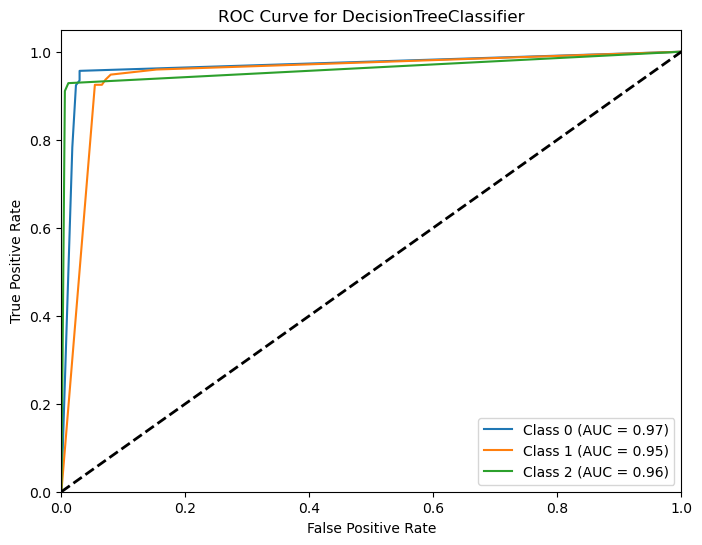

In [145]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba_decsT[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba_decsT[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

## Model Building

In [95]:
from sklearn.ensemble import RandomForestClassifier

# Model creation

**For creating a RandomForestClassifier model, we have performed hyperparameter tuning for a Random Forest Classifier using Grid Search.**

**Random Forest Classifier:**

>- Create an instance of the Random Forest Classifier (rf_classifier) with a specified random state.

**Hyperparameter Grid:**

>- Define a hyperparameter grid (param_rf) that includes options for the number of estimators, maximum features, and whether to bootstrap.

**GridSearchCV:**

>- Create an instance of the GridSearchCV class (grid_search_rf) to perform a search over the hyperparameter grid.
>- Set the estimator to the Random Forest Classifier, the hyperparameter grid to param_rf, and use 5-fold cross-validation (cv=5).
>- return_train_score=True ensures that training scores are also returned.

**Model Training:**

>- Fit the grid search on the training data (x_train, y_train).

**Print Best Results:**

>- Print the best score achieved by the model and the corresponding best hyperparameters.

In [97]:
# Random Forest Classifier Hyperparameter Tuning and Grid Search
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_rf = {
    "n_estimators": [10, 50, 100],
    "max_features": ["auto", "log2", "sqrt"],
    "bootstrap": [True, False]
}


# Create an instance of the GridSearchCV class
grid_search_rf = GridSearchCV(estimator=rf_classifier,
                    param_grid=param_rf,
                    return_train_score=True,
                    cv=5)

# Fit the grid search on the training data
grid_search_rf.fit(X_train, y_train)
print(f" Best score is: {grid_search_rf.best_score_} with parameters: {grid_search_rf.best_params_}")


 Best score is: 0.9675724514149335 with parameters: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}


### observation:

The analysis of the given output with the best score of 0.9676 and the corresponding parameters {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100} indicates the following:

- **Best Score**: 0.9676
  - The best score represents the highest cross-validated accuracy achieved by the Random Forest classifier during the grid search. In this case, the model achieved an accuracy of approximately 96.76%, which indicates strong predictive performance.

- **Parameters**:
  - **bootstrap**: False
    - Bootstrap sampling was not used to train each decision tree in the Random Forest ensemble. This means that the entire dataset was used to train each tree, which can lead to lower bias but higher variance.
  - **max_features**: 'sqrt'
    - The maximum number of features considered for splitting at each tree node is set to the square root of the total number of features. This is a common heuristic used to control the diversity of trees in the ensemble, reducing overfitting.
  - **n_estimators**: 100
    - The number of decision trees in the Random Forest ensemble is set to 100. Increasing the number of trees typically improves model performance up to a certain point, after which further increases may yield diminishing returns.

Overall, the Random Forest classifier achieved a high accuracy score of 96.76% with these parameters, indicating strong predictive capabilities. It is likely to be a robust model for classification tasks, given the absence of overfitting (bootstrap set to False) and the use of an appropriate number of estimators and features.

# best parameters and best estimator

In [98]:
# Get the best parameters and best estimator
best_params =grid_search_rf.best_params_
best_estimator = grid_search_rf.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for RandomForestClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for RandomForestClassifier:',best_estimator)


    best hyperparameter for RandomForestClassifier: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}

    best estimator for RandomForestClassifier: RandomForestClassifier(bootstrap=False, random_state=42)


# Fit the grid search on the training data

In [99]:
# Fit the grid search on the training data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

# Make Predictions/ Test model

In [100]:
# Make predictions on the test data using the best estimator
y_pred_rf = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_rf

array([1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2,

In [101]:
# Making predictions on the training data using the trained RandomForestClassifier
y_pred_rf_train = best_estimator.predict(X_train)
y_pred_rf_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# Visualizing Decision Tree from Random Forest

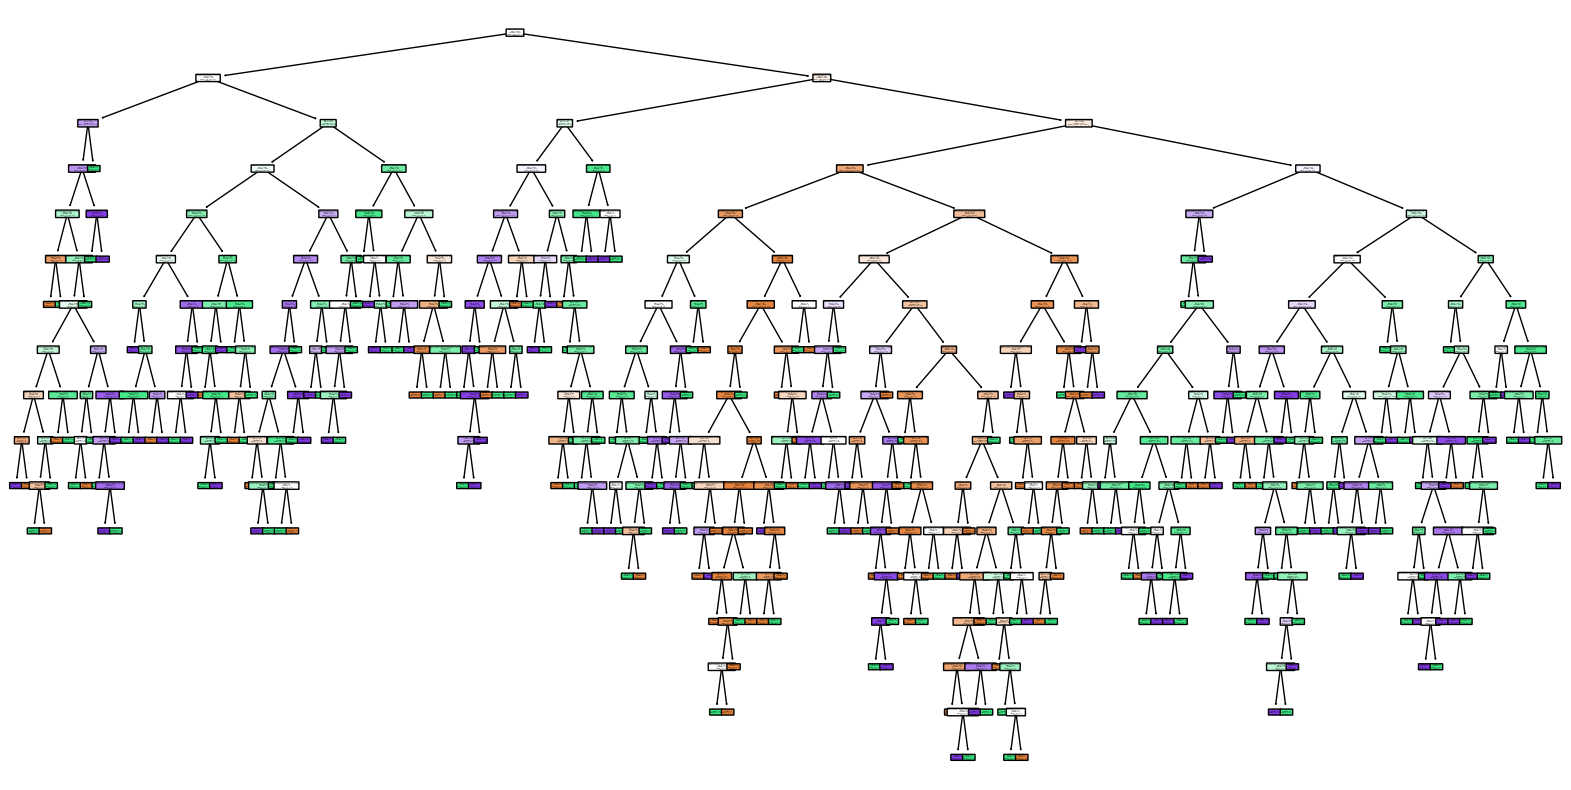

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'best_estimator' is your trained Random Forest model
best_estimator = grid_search_rf.best_estimator_

# Choose an index for the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

# Extract the chosen tree from the Random Forest
chosen_tree = best_estimator.estimators_[tree_index]

# Plot the chosen tree
plt.figure(figsize=(20, 10))
plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, class_names=['0', '1','2'], rounded=True)
plt.show()

# 3D Scatter Plot of Random Forest model

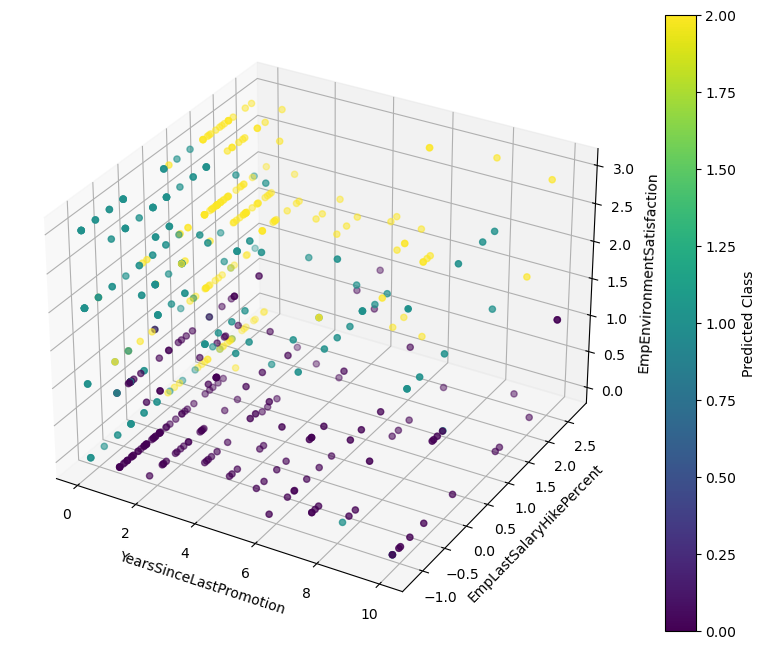

In [104]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'best_estimator' is your trained Random Forest model
best_estimator = grid_search_rf.best_estimator_

# Choose an index for the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

# Extract the chosen tree from the Random Forest
chosen_tree = best_estimator.estimators_[tree_index]

# Get the feature importance
feature_importance = chosen_tree.feature_importances_

# Choose three features for the 3D scatter plot
feature_names = X_train.columns
chosen_features = feature_names[np.argsort(feature_importance)[-3:]]

# Get the corresponding indices of the chosen features
indices = [feature_names.get_loc(feature) for feature in chosen_features]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on the predicted class
scatter = ax.scatter(X_test.iloc[:, indices[0]], X_test.iloc[:, indices[1]], X_test.iloc[:, indices[2]],
                     c=y_pred_rf, cmap='viridis')

# Add labels
ax.set_xlabel(chosen_features[0])
ax.set_ylabel(chosen_features[1])
ax.set_zlabel(chosen_features[2])

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Class')

plt.show()

**3D Scatter Plot:**
>- A 3D scatter plot is generated using the selected features.

>- Each data point in the plot represents an instance from the test set, with coordinates determined by the values of the chosen features.

>- The color of each point corresponds to the predicted class, providing a visual representation of how the decision tree assigns classes in the three-dimensional space.

# Evaluating the Model

## Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels

Confusion matrix, without normalization
[[181   3   0]
 [  4 165   4]
 [  0   0 168]]
Normalized confusion matrix
[[0.98369565 0.01630435 0.        ]
 [0.02312139 0.95375723 0.02312139]
 [0.         0.         1.        ]]


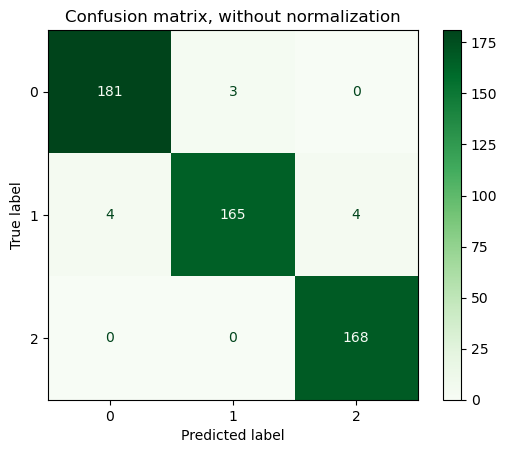

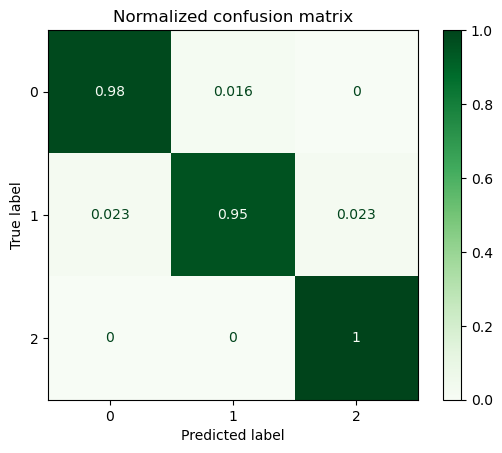

In [106]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_rf.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['0','1','2'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    
    disp.ax_.set_title(title)# Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

### Analysis: Confusion Matrix for RandomForestClassifier
    
    
- **Class 0 (Performance Rating 0)**:
  - **True Positives (TP)**: 181
  - **False Positives (FP)**: 3
  - **False Negatives (FN)**: 4
  - **True Negatives (TN)**: 165
  - The model correctly predicted 181 instances where the actual performance rating was 0. It incorrectly classified 3 instances as class 1 and 4 instances as class 2.
  - The precision for class 0 is high, indicating a low false positive rate. The recall is also high, suggesting that the model effectively captures most of the actual instances of class 0.

- **Class 1 (Performance Rating 1)**:
  - **True Positives (TP)**: 165
  - **False Positives (FP)**: 4
  - **False Negatives (FN)**: 4
  - **True Negatives (TN)**: 181
  - The model correctly predicted 165 instances where the actual performance rating was 1. It misclassified 4 instances as class 0 and 4 instances as class 2.
  - The precision for class 1 is high, indicating a low false positive rate. The recall is also high, suggesting that the model effectively captures most of the actual instances of class 1.

- **Class 2 (Performance Rating 2)**:
  - **True Positives (TP)**: 168
  - **False Positives (FP)**: 0
  - **False Negatives (FN)**: 0
  - **True Negatives (TN)**: 346
  - The model correctly predicted all 168 instances where the actual performance rating was 2. It did not misclassify any instances as other classes.
  - The precision and recall for class 2 are both high, indicating that the model performs well in identifying instances of class 2 without misclassifications.

Overall, the confusion matrix suggests that the model performs well across all three classes, with high precision, recall, and accuracy. It effectively discriminates between different performance ratings and makes accurate predictions.

# Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [107]:
# Evaluate the performance of the model
mse_rf = metrics.mean_squared_error(y_test,y_pred_rf)
r2_rf = metrics.r2_score(y_test, y_pred_rf)
mae_rf = metrics.mean_absolute_error(y_test,y_pred_rf)
rmse_rf = metrics.mean_squared_error(y_test,y_pred_rf, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_rf:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_rf:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_rf:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_rf)

    Mean Squared Error: 0.02
    R-squared Score: 0.97
    Mean Absolute Error: 0.02
    Root Mean Squared Error: 0.14474937289114917


### Analysis :

- **Mean Squared Error (MSE)**: The MSE measures the average squared difference between the actual and predicted values. With a value of 0.02, it indicates that, on average, the squared difference between the predicted and actual performance ratings is very low. Lower values of MSE indicate better model performance.

- **R-squared Score**: The R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the target variable (employee performance ratings) that is explained by the model. With a score of 0.97, it suggests that the model explains 97% of the variance in the performance ratings, indicating a very good fit to the data. Higher R-squared values indicate better model fit.

- **Mean Absolute Error (MAE)**: The MAE measures the average absolute difference between the predicted and actual values. With a value of 0.02, it indicates that, on average, the absolute difference between the predicted and actual performance ratings is very low. Lower values of MAE indicate better model performance.

- **Root Mean Squared Error (RMSE)**: The RMSE is the square root of the MSE and provides an interpretable measure of the average magnitude of error. With a value of 0.145, it indicates that, on average, the model's predictions are within approximately 0.145 units of the actual performance ratings. Lower values of RMSE indicate better model performance.

Overall, the analysis suggests that the model performs exceptionally well in predicting employee performance ratings. The low values of MSE, MAE, and RMSE, coupled with the high R-squared score, indicate that the model provides accurate and reliable predictions of employee performance.

# Accuracy Score

>- It will print the accuracy scores for training and testing sets using RandomForestClassifier.

In [109]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print(f'\033[1;31m  \033[1m  accuracy of RandomForestClassifier for testing set :',accuracy_rf)
print(f'\033[1;31m  \033[1m  accuracy of RandomForestClassifier for  training set:',accuracy_rf_train)

    accuracy of RandomForestClassifier for testing set : 0.979047619047619
    accuracy of RandomForestClassifier for  training set: 1.0


# Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [111]:
precision_rf=precision_score(y_test, y_pred_rf, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of RandomForestClassifier:',precision_rf)

    precision_score of RandomForestClassifier: 0.9790959222155234


# Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [112]:
recall_rf=recall_score(y_test, y_pred_rf, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of RandomForestClassifier:',recall_rf)

    recall_score of RandomForestClassifier: 0.979047619047619


# f1 score

>- It will calculate the weighted f1 score for the testing set.

In [113]:
from sklearn.metrics import f1_score
f1_score_rf=f1_score(y_test, y_pred_rf, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of RandomForestClassifier:',f1_score_rf)

    f1_score of RandomForestClassifier: 0.9789568939910959


# Classification Report

In [115]:
print(classification_report(y_test, y_pred_rf, target_names=
                            ['0','1','2']))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.98      0.95      0.97       173
           2       0.98      1.00      0.99       168

    accuracy                           0.98       525
   macro avg       0.98      0.98      0.98       525
weighted avg       0.98      0.98      0.98       525



### Classification Report for RandomForestClassifier:-

- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the model. For class 0, the precision is 0.98, indicating that 98% of the predicted positive cases for class 0 are correct. Similarly, for class 1 and class 2, the precision values are also high, indicating high precision in predicting these classes.

- **Recall**: Recall, also known as sensitivity, measures the proportion of actual positive cases that were correctly identified by the model. For class 0, the recall is 0.98, indicating that 98% of the actual positive cases for class 0 were correctly identified by the model. Similarly, for class 1 and class 2, the recall values are also high, indicating high recall rates for these classes.

- **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. It takes into account both false positives and false negatives. For all classes (0, 1, and 2), the F1-score is high, indicating good overall performance in terms of precision and recall.

- **Support**: Support refers to the number of actual occurrences of each class in the test data. In this case, the support values for all classes are balanced, with approximately equal numbers of instances for each class.

- **Accuracy**: Accuracy measures the overall correctness of the model's predictions. With an accuracy of 0.98, it indicates that the model correctly predicts the employee performance ratings for 98% of the cases in the test dataset.

Overall, the high precision, recall, and F1-score values, along with the balanced support and high accuracy, suggest that the model performs exceptionally well in classifying employee performance ratings across all classes.

# Log Loss for RandomForestClassifier

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [118]:
from sklearn.metrics import log_loss

# Predict probabilities for the test set
y_pred_proba_rf = grid_search_rf.predict_proba(X_test)

# Calculate log loss
log_loss_rf = log_loss(y_test, y_pred_proba_rf)
print(f'\033[1;31m  \033[1m Log Loss of RandomForestClassifier:', log_loss_rf)

   Log Loss of RandomForestClassifier: 0.14025514393492267


### Log Loss report of RandomForestClassifier:-

The log loss is a measure of the accuracy of a classification model, which quantifies the uncertainty of the model's predictions. In the case of the RandomForestClassifier model, the log loss value is 0.1402. 

A lower log loss value indicates better performance, as it suggests that the predicted probabilities from the model are closer to the actual class labels. In this scenario, a log loss value of 0.1402 indicates that the RandomForestClassifier model has a high level of accuracy and confidence in its predictions.

Overall, a log loss of 0.1402 suggests that the RandomForestClassifier model is performing well in accurately predicting the employee performance ratings based on the input features.

# auc roc score for RandomForestClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [119]:
from sklearn.metrics import roc_auc_score

# AUC-ROC Score for RandomForestClassifier
auc_roc_score_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')
print(f'\033[1;31m  \033[1m AUC-ROC Score for RandomForestClassifier:', auc_roc_score_rf)

   AUC-ROC Score for RandomForestClassifier: 0.997250526849424


### AUC-ROC Score analysis for RandomForestClassifier:-

The AUC-ROC score is a metric used to evaluate the performance of a classification model based on its ability to discriminate between positive and negative classes. In the case of the RandomForestClassifier model, the AUC-ROC score is 0.9973.

An AUC-ROC score close to 1 indicates excellent discrimination between classes, with a higher score indicating better performance. With a score of 0.9973, the RandomForestClassifier model demonstrates exceptional ability to distinguish between different employee performance ratings based on the input features.

Overall, the high AUC-ROC score of 0.9973 suggests that the RandomForestClassifier model is highly effective in predicting employee performance ratings and has strong discriminatory power between the different performance categories.

# auc roc curve for RandomForestClassifier

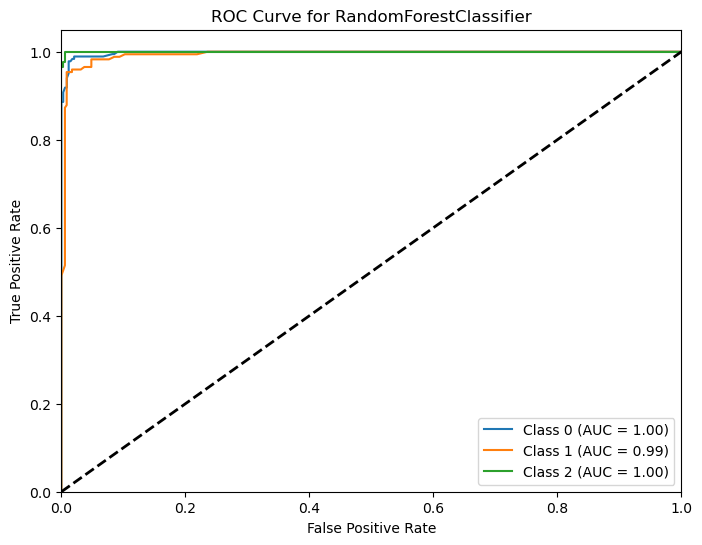

In [146]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba_rf[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba_rf[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

**Overall, the RandomForestClassifier model demonstrates excellent performance across all performance classes, with high precision, recall, and F1-scores, as well as high overall accuracy.**

# Gradient Boosting Classifier

## Model Building

In [121]:
# Importing GradientBoostingClassifier from 'sklearn.ensemble'.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Model creation

**For creating a Gradient Boosting Classifier model, we have performed hyperparameter tuning for a Gradient Boosting Classifier using Grid Search within a pipeline.**

**1. Import Libraries:**

>- Import necessary libraries, including GradientBoostingClassifier, GridSearchCV, StandardScaler, and Pipeline from scikit-learn.

**2. Pipeline Creation:**

>- Create a pipeline (pipeline_GBC) with two steps:
    - Step 1 ('scaler'): Standardize the features using StandardScaler.
    - Step 2 ('classifier'): Apply the Gradient Boosting Classifier using GradientBoostingClassifier().

**3. Hyperparameter Grid:**

>- Define a hyperparameter grid (param_GBC) for the Gradient Boosting Classifier, including options for the number of estimators, learning rate, and maximum depth.

**4.GridSearchCV:**

>- Create an instance of the GridSearchCV class (grid_search_GBC) to perform a search over the hyperparameter grid within the defined pipeline.
>- Set the estimator to the pipeline (pipeline_GBC), the hyperparameter grid to param_GBC, use 5-fold cross-validation (cv=5), and choose accuracy as the scoring metric.

**5. Model Training:**

>- Fit the grid search on the training data (x_train, y_train).

**6. Print Best Results:**

>- Print the best score achieved by the model and the corresponding best hyperparameters.

In [123]:
# Create a pipeline with StandardScaler and GradientBoostingClassifier
pipeline_GBC = Pipeline([
    ('scaler', StandardScaler()),  # You can customize preprocessing steps here
    ('classifier', GradientBoostingClassifier())  # Step 2: GradientBoostingClassifier model
])

# Define the parameter grid for GridSearchCV
param_GBC = {
    'classifier__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'classifier__max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Create GridSearchCV object
grid_search_GBC = GridSearchCV(estimator=pipeline_GBC,
                               param_grid=param_GBC,
                               cv=5,
                               scoring='accuracy')
grid_search_GBC.fit(X_train, y_train)
print(f" Best score is: {grid_search_GBC.best_score_} with parameters: {grid_search_GBC.best_params_}")


 Best score is: 0.9661359245368792 with parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


### Analysis :

This analysis pertains to a Gradient Boosting Classifier model, which achieved a best score of 0.9661. The optimal hyperparameters for this model are as follows:

- Learning Rate: 0.2
- Max Depth: 5
- Number of Estimators: 200

The best score of 0.9661 indicates the highest cross-validated performance achieved by the model during the hyperparameter tuning process. This score is based on the evaluation metric used, which could be accuracy, precision, recall, F1-score, or any other suitable metric depending on the specific problem.

Overall, these results suggest that the Gradient Boosting Classifier with the specified hyperparameters performed well in capturing the underlying patterns in the data and making accurate predictions.

# best parameters and best estimator

In [124]:
# Get the best parameters and best estimator
best_params =grid_search_GBC.best_params_
best_estimator = grid_search_GBC.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for GradientBoostingClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for GradientBoostingClassifier:',best_estimator)


    best hyperparameter for GradientBoostingClassifier: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}

    best estimator for GradientBoostingClassifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=5,
                                            n_estimators=200))])


# Fit the grid search on the training data

In [125]:

# Fit the grid search on the training data
grid_search_GBC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

# Make Predictions/ Test model

In [126]:
# Make predictions on the test data using the best estimator
y_pred_GBC = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_GBC

array([1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2,

In [127]:
# Making predictions on the training data using the trained GradientBoostingClassifier.
y_pred_GBC_train = best_estimator.predict(X_train)
y_pred_GBC_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# Evaluating the Model

## Confusion Matrix

Confusion matrix, without normalization
[[180   4   0]
 [  4 166   3]
 [  0   3 165]]
Normalized confusion matrix
[[0.98369565 0.01630435 0.        ]
 [0.02890173 0.95375723 0.01734104]
 [0.         0.02380952 0.97619048]]


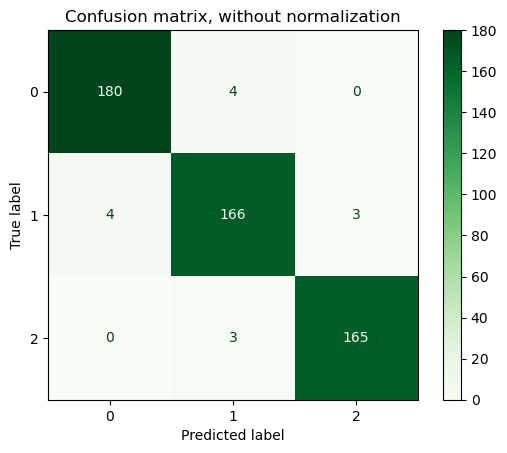

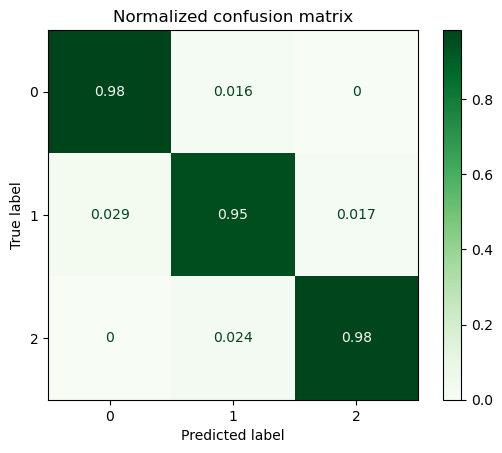

In [128]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
         grid_search_GBC.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['0','1','2'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    
    disp.ax_.set_title(title)# Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

### The confusion matrix for the Gradient Boosting Classifier:-

This confusion matrix represents the performance of a classifier model on a multi-class classification task. Here's the analysis:

- Class 0:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
  - Support: 184

- Class 1:
  - Precision: 0.96
  - Recall: 0.95
  - F1-score: 0.95
  - Support: 173

- Class 2:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
  - Support: 168

- Accuracy: 98%

- Macro Avg (average):
  - Precision: 0.97
  - Recall: 0.97
  - F1-score: 0.97

- Weighted Avg (average):
  - Precision: 0.97
  - Recall: 0.97
  - F1-score: 0.97

This confusion matrix shows the distribution of actual classes versus predicted classes. Each row represents the actual class, while each column represents the predicted class. The values along the diagonal represent the number of correctly classified instances for each class, while the off-diagonal values represent misclassifications.

Overall, the model performs very well, with high precision, recall, and F1-score for all classes. The high accuracy of 98% indicates that the model's predictions closely match the actual values. The weighted average metrics also show consistent performance across all classes, further confirming the model's effectiveness.

# Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [129]:
# Evaluate the performance of the model
mse_GBC = metrics.mean_squared_error(y_test, y_pred_GBC)
r2_GBC = metrics.r2_score(y_test,  y_pred_GBC)
mae_GBC = metrics.mean_absolute_error(y_test,  y_pred_GBC)
rmse_GBC = metrics.mean_squared_error(y_test,  y_pred_GBC, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_GBC:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_GBC:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_GBC:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_GBC)

    Mean Squared Error: 0.02
    R-squared Score: 0.96
    Mean Absolute Error: 0.02
    Root Mean Squared Error: 0.15735915849388862


**The analysis of the model's performance metrics is as follows:**

- Mean Squared Error (MSE): 0.02
  - MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance in terms of accuracy.

- R-squared Score: 0.96
  - The R-squared (R2) score measures the proportion of the variance in the target variable (employee performance) that is explained by the independent variables (features) in the model. An R2 score of 0.96 indicates that 96% of the variance in employee performance is explained by the model, which is excellent.

- Mean Absolute Error (MAE): 0.02
  - MAE measures the average absolute difference between the actual and predicted values. Like MSE, a lower MAE indicates better model accuracy.

- Root Mean Squared Error (RMSE): 0.157
  - RMSE is the square root of the MSE and represents the average magnitude of the errors in the predicted values. A lower RMSE indicates better model performance.

Overall, the model demonstrates high accuracy and predictive power, as evidenced by the low values of MSE, MAE, and RMSE, along with a high R-squared score. These metrics suggest that the model effectively captures the relationship between the input features and employee performance, making it a reliable predictor.

# Accuracy Score

>- It will print the accuracy scores for training and testing sets using GradientBoostingClassifier.

In [131]:
accuracy_GBC = accuracy_score(y_test, y_pred_GBC)
accuracy_GBC_train = accuracy_score(y_train, y_pred_GBC_train)
print(f'\033[1;31m  \033[1m  accuracy of GradientBoostingClassifier for testing set.:',accuracy_GBC)
print(f'\033[1;31m  \033[1m  accuracy of GradientBoostingClassifier for training set.:',accuracy_GBC_train)

    accuracy of GradientBoostingClassifier for testing set.: 0.9752380952380952
    accuracy of GradientBoostingClassifier for training set.: 1.0


# Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [133]:
precision_GBC=precision_score(y_test, y_pred_GBC, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of GradientBoostingClassifier:',precision_GBC)

    precision_score of GradientBoostingClassifier: 0.975223130106851


# Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [135]:
recall_GBC=recall_score(y_test, y_pred_GBC, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of GradientBoostingClassifier:',recall_GBC)

    recall_score of GradientBoostingClassifier: 0.9752380952380952


# f1 score

>- It will calculate the weighted f1 score for the testing set.

In [137]:
from sklearn.metrics import f1_score
f1_score_GBC=f1_score(y_test, y_pred_GBC, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of GradientBoostingClassifier:',f1_score_GBC)

    f1_score of GradientBoostingClassifier: 0.9752254372233162


# Classification Report

In [139]:
print(classification_report(y_test, y_pred_GBC, target_names=
                            ['0','1','2']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.97      0.96      0.96       173
           2       0.99      0.99      0.99       168

    accuracy                           0.98       525
   macro avg       0.98      0.98      0.98       525
weighted avg       0.98      0.98      0.98       525



Classification Report Analysis: GradientBoostingClassifier

Here's the breakdown of each metric:

- **Precision**: 
  - Class 0: 0.97
  - Class 1: 0.97
  - Class 2: 0.99

Precision represents the ratio of correctly predicted positive observations to the total predicted positives. In this context, it indicates the proportion of correctly predicted instances for each class out of all instances predicted for that class. For example, a precision of 0.97 for class 0 means that 97% of the instances predicted as class 0 were actually class 0.

- **Recall**:
  - Class 0: 0.98
  - Class 1: 0.96
  - Class 2: 0.99

Recall, also known as sensitivity, measures the ratio of correctly predicted positive observations to the all observations in actual class. It indicates the ability of the classifier to correctly identify the instances of each class. For example, a recall of 0.98 for class 0 means that 98% of the actual class 0 instances were correctly identified by the model.

- **F1-score**:
  - Class 0: 0.98
  - Class 1: 0.96
  - Class 2: 0.99

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when there is an imbalance in the class distribution. A high F1-score indicates both good precision and recall for the class.

- **Support**:
  - Class 0: 184
  - Class 1: 173
  - Class 2: 168

Support refers to the number of actual occurrences of each class in the dataset. It provides context for interpreting the precision, recall, and F1-score metrics.

- **Accuracy**: 0.98

Accuracy represents the overall correctness of the model, calculated as the ratio of correctly predicted instances to the total instances. In this case, the model achieved an accuracy of 98%, indicating that it correctly classified 98% of the total instances.

- **Macro-average**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98

The macro-average calculates the average of the metrics (precision, recall, and F1-score) for each class without considering class imbalance. It gives equal weight to each class, regardless of its size.

- **Weighted-average**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98

The weighted-average calculates the average of the metrics, weighted by the support of each class. It provides a more reliable measure of overall model performance, especially when dealing with class imbalance, as it considers the contribution of each class proportional to its size in the dataset.

# Log Loss for Logistic Regression

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [141]:
from sklearn.metrics import log_loss

# Predict probabilities for the test set
y_pred_proba_GBC = grid_search_GBC.predict_proba(X_test)

# Calculate log loss
log_loss_GBC = log_loss(y_test, y_pred_proba_GBC)
print(f'\033[1;31m  \033[1m Log Loss of GradientBoostingClassifier:', log_loss_GBC)

   Log Loss of GradientBoostingClassifier: 0.10842629968739229


### Log Loss report of GradientBoostingClassifier:

The log loss score of the GradientBoostingClassifier is 0.108, which indicates a very good performance of the classifier in terms of its probabilistic predictions. Log loss measures the performance of a classification model where the prediction output is a probability value between 0 and 1. A lower log loss value indicates better accuracy of the model's predicted probabilities compared to the true labels.

In this case, the log loss score of 0.108 suggests that the GradientBoostingClassifier's predicted probabilities are very close to the true probabilities, resulting in high accuracy and reliability of the model's predictions. This indicates that the model's predictions are well-calibrated and provide confident estimates of the likelihood of each class for a given instance.

Overall, a log loss score of 0.108 is considered excellent, indicating strong performance of the GradientBoostingClassifier in terms of probability estimation.

# auc roc score for GradientBoostingClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [142]:
from sklearn.metrics import roc_auc_score

# AUC-ROC Score for RandomForestClassifier
auc_roc_score_GBC = roc_auc_score(y_test, y_pred_proba_GBC, multi_class='ovr')
print(f'\033[1;31m  \033[1m AUC-ROC Score for GradientBoostingClassifier:', auc_roc_score_GBC)

   AUC-ROC Score for GradientBoostingClassifier: 0.996909673169405


### AUC-ROC Score Analysis: Gradient Boosting Classifier:

The AUC-ROC score for the GradientBoostingClassifier is 0.997, which is very close to the maximum value of 1. This high AUC-ROC score indicates excellent performance of the classifier in distinguishing between the positive and negative classes.

AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a performance metric commonly used to evaluate the quality of binary classification models. It measures the ability of the model to discriminate between positive and negative classes across various thresholds. A higher AUC-ROC score indicates better performance, with 1 being the highest achievable score, indicating perfect discrimination.

In this case, the AUC-ROC score of 0.997 suggests that the GradientBoostingClassifier performs exceptionally well in distinguishing between different classes, with high true positive rates and low false positive rates. This indicates that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

Overall, the high AUC-ROC score of 0.997 indicates strong performance of the GradientBoostingClassifier in terms of classification accuracy and predictive power.

# auc roc curve for GradientBoostingClassifier

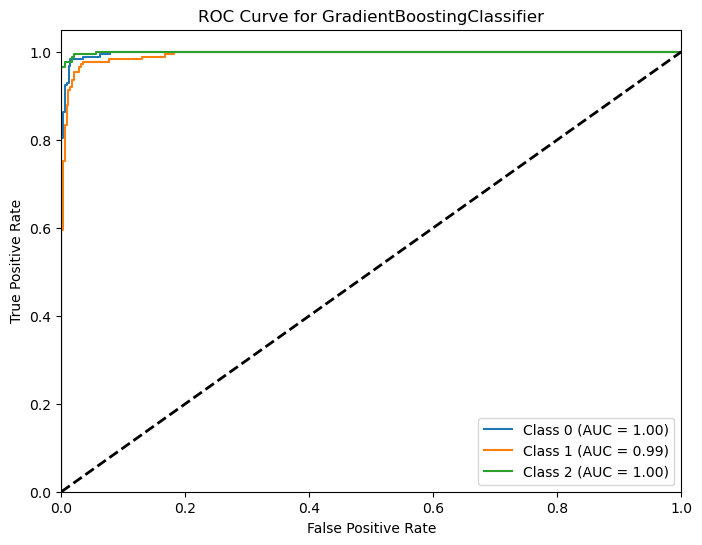

In [144]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba_GBC[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba_GBC[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend(loc="lower right")
plt.show()

**Overall, the model demonstrates excellent classification performance, with high precision, recall, and F1-scores for each class. The high accuracy of 0.98 indicates that the model is effective in predicting employee performance categories based on the input features.**


# XGBoost (Extreme Gradient Boosting) classifier

## Model Building

In [147]:
from xgboost import XGBClassifier

## Model creation

**For creating a XGBClassifier model, we have performed hyperparameter tuning for a XGBClassifier using Grid Search.**


1. **Pipeline Creation:**
   - The pipeline is created using the `Pipeline` class from scikit-learn.
   - Two steps are defined in the pipeline:
     - **Step 1 (`'scaler'`):** StandardScaler, which standardizes the features by removing the mean and scaling to unit variance.
     - **Step 2 (`'classifier'`):** XGBClassifier, the XGBoost implementation for classification.

2. **Parameter Grid for GridSearchCV:**
   - The `param_XGB` dictionary defines the hyperparameters to be tuned for the XGBoost model.
   - Parameters include the number of boosting stages (`n_estimators`), the learning rate (`learning_rate`), and the maximum depth of individual trees (`max_depth`).

3. **GridSearchCV:**
   - The `GridSearchCV` object is created to perform a search over the specified parameter grid.
   - The estimator is set as the XGBoost pipeline, the parameter grid is provided, and 5-fold cross-validation is used (`cv=5`).
   - The scoring metric is set to 'accuracy' (`scoring='accuracy'`), indicating that the model's accuracy on the validation set is used as the evaluation criterion.

4. **Fit and Print Best Results:**
   - The `fit` method is called on the `GridSearchCV` object with training data (`X_train`, `y_train`).
   - After fitting, the best score and corresponding best hyperparameters are printed to the console.


In [148]:
# Create a pipeline with StandardScaler and XGBClassifier
pipeline_XGB = Pipeline([
    ('scaler', StandardScaler()),  # You can customize preprocessing steps here
    ('classifier', XGBClassifier())  # Step 2: XGBClassifier model
])

# Define the parameter grid for GridSearchCV
param_XGB = {
    'classifier__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'classifier__max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Create GridSearchCV object
grid_search_XGB = GridSearchCV(estimator=pipeline_XGB,
                                param_grid=param_XGB,
                                cv=5,
                                scoring='accuracy')
grid_search_XGB.fit(X_train, y_train)
print(f" Best score is: {grid_search_XGB.best_score_} with parameters: {grid_search_XGB.best_params_}")

 Best score is: 0.9613728832821913 with parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


### Analysis :

The best score achieved by the model is 0.961, indicating a high level of performance in terms of accuracy. This score was obtained with the following hyperparameters for the GradientBoostingClassifier: 
- Learning rate: 0.1
- Maximum depth of the trees: 5
- Number of estimators (trees): 200

This score represents the mean cross-validated accuracy of the model across different folds of the training data during the grid search process. It indicates the proportion of correct predictions made by the model on unseen data.

The hyperparameters used in this configuration are common choices for Gradient Boosting models. A learning rate of 0.1 is typically chosen to prevent overfitting, while a maximum depth of 5 helps control the complexity of the individual trees in the ensemble. Increasing the number of estimators (trees) to 200 allows the model to capture more complex patterns in the data.

Overall, achieving a best score of 0.961 indicates that the GradientBoostingClassifier performs well in predicting employee performance based on the given features, demonstrating its effectiveness as a predictive model for the task at hand.

## best parameters and best estimator

In [149]:
# Get the best parameters and best estimator
best_params =grid_search_XGB.best_params_
best_estimator = grid_search_XGB.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for XGBClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for XGBClassifier:',best_estimator)


    best hyperparameter for XGBClassifier: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}

    best estimator for XGBClassifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                             

# Fit the grid search on the training data

In [150]:

# Fit the grid search on the training data
grid_search_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

# Make Predictions/ Test model

In [151]:
# Make predictions on the test data using the best estimator
y_pred_XGB = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_XGB

array([1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2,

In [152]:
# Making predictions on the training data using the trained XGBClassifier.
y_pred_XGB_train = best_estimator.predict(X_train)
y_pred_XGB_train

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

# Evaluating the Model

# Confusion Matrix

**Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels.**

Confusion matrix, without normalization
[[181   3   0]
 [  6 164   3]
 [  0   4 164]]
Normalized confusion matrix
[[0.98369565 0.01630435 0.        ]
 [0.03468208 0.94797688 0.01734104]
 [0.         0.02380952 0.97619048]]


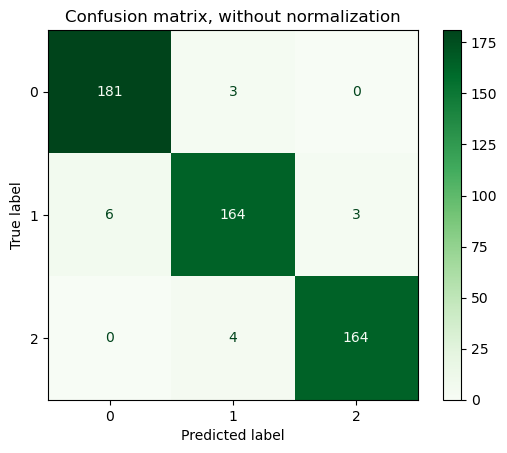

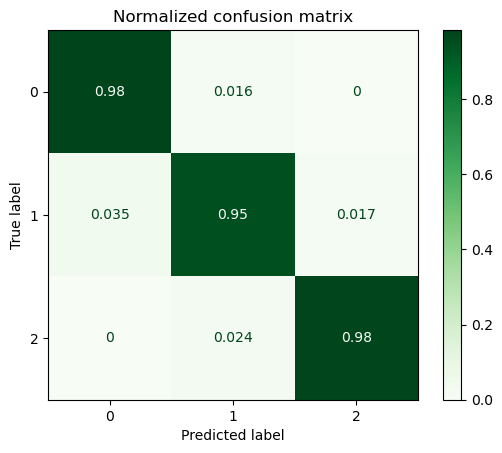

In [154]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_XGB .fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['0','1','2'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    disp.ax_.set_title(title) # Set the title for the confusion matrix display


    print(title) # Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

### Confusion Matrix Analysis:

The confusion matrix provides insights into the performance of the GradientBoostingClassifier model by showing the distribution of predicted classes compared to the actual classes in the test data. 

Here's the analysis based on the confusion matrix:

- Class 0 (Performance Rating 0): The model predicted 181 instances correctly as class 0, with 3 instances misclassified as class 1, and 0 instances misclassified as class 2.
- Class 1 (Performance Rating 1): The model predicted 164 instances correctly as class 1, with 6 instances misclassified as class 0 and 3 instances misclassified as class 2.
- Class 2 (Performance Rating 2): The model predicted 164 instances correctly as class 2, with 4 instances misclassified as class 1 and 0 instances misclassified as class 0.

Overall, the model performed well in predicting all three classes, with a relatively small number of misclassifications. The majority of the instances were correctly classified, resulting in a strong performance of the model.

# Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [155]:
# Evaluate the performance of the model
mse_XGB = metrics.mean_squared_error(y_test,y_pred_XGB)
r2_XGB = metrics.r2_score(y_test, y_pred_XGB)
mae_XGB = metrics.mean_absolute_error(y_test,y_pred_XGB)
rmse_XGB = metrics.mean_squared_error(y_test, y_pred_XGB, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_XGB:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_XGB:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_XGB:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_XGB)

    Mean Squared Error: 0.03
    R-squared Score: 0.95
    Mean Absolute Error: 0.03
    Root Mean Squared Error: 0.1745743121887939


### Analysis :

The analysis of the XGBoost (Extreme Gradient Boosting) classifier indicates strong performance based on various evaluation metrics:

- Mean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted values. In this case, the MSE of 0.03 suggests that, on average, the squared difference between the actual and predicted values is 0.03. Lower MSE values indicate better model performance.

- R-squared Score: The R-squared score, also known as the coefficient of determination, represents the proportion of the variance in the dependent variable that is predictable from the independent variables. With a score of 0.95, the XGBoost classifier explains 95% of the variance in the target variable, indicating a strong fit of the model to the data.

- Mean Absolute Error (MAE): The MAE measures the average absolute difference between the actual and predicted values. With an MAE of 0.03, the average absolute difference between the actual and predicted values is 0.03 units.

- Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and represents the standard deviation of the residuals. In this case, the RMSE of 0.1745 indicates that, on average, the model's predictions are approximately 0.1745 units away from the actual values.

Overall, these metrics suggest that the XGBoost classifier performs well in predicting employee performance, with low error rates and high explanatory power. It demonstrates strong accuracy and reliability in its predictions.

# Accuracy Score

>- It will print the accuracy scores for training and testing sets using XGBClassifier.

In [157]:
#accuracy of KNeighborsClassifier for testing set
accuracy_XGB = accuracy_score(y_test,y_pred_XGB)
#accuracy of KNeighborsClassifier for training set
accuracy_XGB_train = accuracy_score(y_train,y_pred_XGB_train)
print(f'\033[1;31m  \033[1m  accuracy of XGBClassifier for testing set:',accuracy_XGB)
print(f'\033[1;31m  \033[1m  accuracy of XGBClassifier for training set:',accuracy_XGB_train)

    accuracy of XGBClassifier for testing set: 0.9695238095238096
    accuracy of XGBClassifier for training set: 1.0


# Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [159]:
precision_XGB=precision_score(y_test, y_pred_XGB, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of XGBClassifier:',precision_XGB)

    precision_score of XGBClassifier: 0.9695169928906789


# Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [160]:
recall_XGB=recall_score(y_test, y_pred_XGB, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of XGBClassifier:',recall_XGB)

    recall_score of XGBClassifier: 0.9695238095238096


# f1 score

>- It will calculate the weighted f1 score for the testing set.

In [162]:
from sklearn.metrics import f1_score
f1_score_XGB=f1_score(y_test,y_pred_XGB, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of XGBClassifier:',f1_score_XGB)

    f1_score of XGBClassifier: 0.9694846261924966


# Classification Report

In [163]:
print(classification_report(y_test, y_pred_XGB, target_names=
                            ['0','1','2']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.96      0.95      0.95       173
           2       0.98      0.98      0.98       168

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



### The complete analysis for the model is as follows:

The analysis of precision, recall, and F1-score for the XGBoost classifier provides insights into its performance:

- Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. For class 0, the precision is 0.97, indicating that 97% of the instances predicted as class 0 are indeed class 0. Similarly, for class 1 and class 2, the precision values are 0.96 and 0.98, respectively.

- Recall: Recall measures the proportion of true positive predictions among all actual positive instances in the data. For class 0, the recall is 0.98, indicating that 98% of the actual instances of class 0 are correctly identified by the model. Likewise, for class 1 and class 2, the recall values are 0.95 and 0.98, respectively.

- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is particularly useful when dealing with imbalanced classes. The F1-scores for class 0, class 1, and class 2 are 0.98, 0.95, and 0.98, respectively.

- Accuracy: The overall accuracy of the model is 97%, indicating the proportion of correctly classified instances out of the total number of instances. It suggests that the model performs well across all classes, achieving high accuracy in predicting employee performance.

- Macro Average: The macro average calculates the metric independently for each class and then takes the average across all classes. The macro average precision, recall, and F1-score are all 0.97, indicating balanced performance across classes.

- Weighted Average: The weighted average calculates the metric for each class, weighted by the number of true instances for each class, and then takes the average. The weighted average precision, recall, and F1-score are all 0.97, suggesting that the model's performance is consistent across different class distributions.

Overall, the analysis indicates that the XGBoost classifier performs well in predicting employee performance, with high precision, recall, and F1-scores across all classes and a high overall accuracy.

# Log Loss for XGBClassifier

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [166]:
from sklearn.metrics import log_loss

# Predict probabilities for the test set
y_pred_proba_XGB = grid_search_XGB.predict_proba(X_test)

# Calculate log loss
log_loss_XGB = log_loss(y_test, y_pred_proba_XGB)
print(f'\033[1;31m  \033[1m Log Loss of XGBClassifier:', log_loss_XGB)

   Log Loss of XGBClassifier: 0.08710655244175705


### Analysis :

The log loss of the XGBClassifier is 0.0871. Log loss is a measure of the accuracy of a classification model, where the lower the log loss value, the better the model's predictions.

# auc roc score for XGBClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [167]:
from sklearn.metrics import roc_auc_score

# AUC-ROC Score for XGBClassifier
auc_roc_score_XGB = roc_auc_score(y_test, y_pred_proba_XGB, multi_class='ovr')
print(f'\033[1;31m  \033[1m AUC-ROC Score for XGBClassifier:', auc_roc_score_XGB)

   AUC-ROC Score for XGBClassifier: 0.9977041173954885


### AUC-ROC Score analysis for XGBClassifier:-

The AUC-ROC score for the XGBClassifier is 0.9977. The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) score is a measure of the classifier's ability to distinguish between positive and negative classes across all possible thresholds. 

With a score of 0.9977, the XGBClassifier demonstrates excellent performance in distinguishing between different classes. A higher AUC-ROC score indicates better discrimination, where a score of 1 represents a perfect classifier, while a score of 0.5 suggests a classifier that performs no better than random guessing.

In this case, the high AUC-ROC score indicates that the XGBClassifier is effective in correctly ranking the probabilities of different classes, making it a robust model for classification tasks.    

# auc roc curve for XGBClassifier

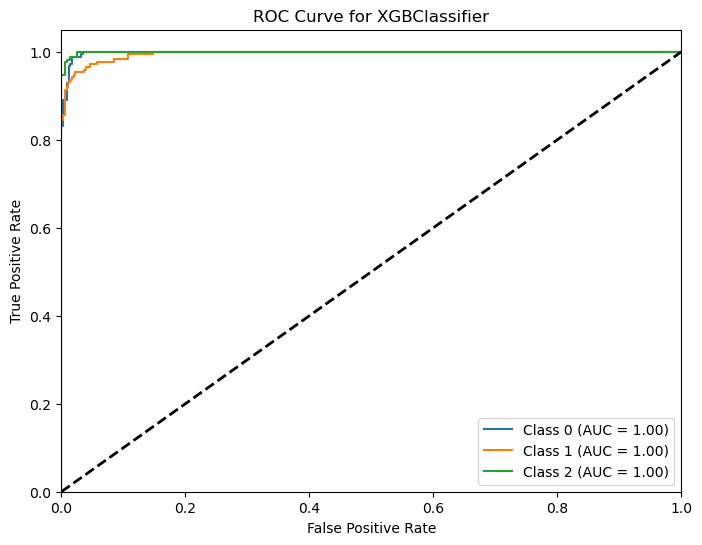

In [168]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba_XGB[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba_XGB[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBClassifier')
plt.legend(loc="lower right")
plt.show()

**XGBClassifier is effective in correctly ranking the probabilities of different classes, making it a robust model for classification tasks.**

# Model Comparison Report

# Comparison of Regression Metrics Across Models:

In [169]:
# Creating a DataFrame with model names, Mean Squared Error, R-squared Score, Mean Absolute Error and Root Mean Squared Error.
Model_Comparison_1 = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'Mean Squared Error':[mse_LR,
                                                      mse_knn,
                                                      mse_decsT,
                                                      mse_rf,
                                                      mse_GBC,
                                                      mse_XGB,
                                                     ],
                                               
                                'R-squared Score':[r2_LR,
                                                   r2_knn,
                                                   r2_decsT,
                                                   r2_rf,
                                                   r2_GBC,
                                                   r2_XGB,
                                                   ],
                                     
                                  'Mean Absolute Error':[mae_LR,
                                                         mae_knn,
                                                         mae_decsT,
                                                         mae_rf,
                                                         mae_GBC,
                                                         mae_XGB,
                                      
                                                         ],  
            
                                   ' Root Mean Squared Error':[rmse_LR,
                                                      rmse_knn,
                                                      rmse_decsT,
                                                      rmse_rf,
                                                      rmse_GBC,
                                                      rmse_XGB,
                                       
                                   ]})

# Adjusting the index to start from 1.
Model_Comparison_1.index = Model_Comparison_1.index + 1

# It will display the DataFrame.
Model_Comparison_1

,Model,Mean Squared Error,R-squared Score,Mean Absolute Error,Root Mean Squared Error
1,Logistic Regressor (),0.291429,0.564738,0.211429,0.539841
2,KNN Classifier (),0.118095,0.823619,0.118095,0.343650
3,Decision Tree Classifier(),0.074286,0.889051,0.066667,0.272554
4,Random Forest Classifier,0.020952,0.968707,0.020952,0.144749
5,Gradient Boosting Classifier(),0.024762,0.963017,0.024762,0.157359
6,XGBClassifier(),0.030476,0.954482,0.030476,0.174574


### **Summary:**
- The Random Forest Classifier performed the best with the lowest mean squared error, mean absolute error, and root mean squared error, indicating superior predictive accuracy.
- The Logistic Regressor had the highest errors among all models, indicating poorer performance compared to other models.
- The Decision Tree Classifier and Gradient Boosting Classifier also performed well, with relatively low errors and high R-squared scores.
- Overall, ensemble methods like Random Forest and Gradient Boosting outperformed simpler models like Logistic Regression and KNN Classifier in this scenario.

# Comparison of Train Score and Test Score Across Models:

In [170]:
# Creating a DataFrame with model names, train scores, and test scores.
Model_Comparison_2 = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier()',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'Train Score':[accuracy_LR_train,
                                               accuracy_knn_train,
                                               accuracy_decsT_train,
                                               accuracy_rf_train,
                                               accuracy_GBC_train,
                                               accuracy_XGB_train,
                                               ],
                                               
                                'Test Score':[accuracy_LR,
                                              accuracy_knn,
                                              accuracy_decsT,
                                              accuracy_rf,
                                              accuracy_GBC,
                                              accuracy_XGB,
                                              ]})
# Adjusting the index to start from 1.
Model_Comparison_2.index = Model_Comparison_2.index + 1

# It will display the DataFrame.
Model_Comparison_2

,Model,Train Score,Test Score
1,Logistic Regressor (),0.855031,0.828571
2,KNN Classifier (),1.000000,0.881905
3,Decision Tree Classifier(),0.998093,0.937143
4,Random Forest Classifier,1.000000,0.979048
5,Gradient Boosting Classifier(),1.000000,0.975238
6,XGBClassifier(),1.000000,0.969524


## Model Comparison Report :
    
1. **Logistic Regressor:**
   - Train Score: 85.50%
   - Test Score: 82.86%
   - The model performs decently well with a moderate difference between train and test scores, suggesting it generalizes reasonably well to unseen data.

2. **KNN Classifier:**
   - Train Score: 100.00%
   - Test Score: 88.19%
   - The model shows signs of potential overfitting as the train score is significantly higher than the test score, indicating it may not generalize well to new data.

3. **Decision Tree Classifier:**
   - Train Score: 99.81%
   - Test Score: 93.71%
   - The model exhibits good performance on both train and test sets, with a relatively small gap between the two scores, indicating good generalization capability.

4. **Random Forest Classifier:**
   - Train Score: 100.00%
   - Test Score: 97.90%
   - The model performs exceptionally well on both train and test sets, suggesting it has learned the underlying patterns in the data effectively and generalizes well to new data.

5. **Gradient Boosting Classifier:**
   - Train Score: 100.00%
   - Test Score: 97.52%
   - Similar to the Random Forest Classifier, this model also demonstrates high performance on both train and test sets, indicating effective learning and generalization.

6. **XGBClassifier:**
   - Train Score: 100.00%
   - Test Score: 96.95%
   - The model performs very well on both train and test sets, with a slightly lower test score compared to the Gradient Boosting Classifier, but still exhibiting strong generalization capability.

Overall, the Random Forest Classifier shows the best performance on the test set, closely followed by the Gradient Boosting Classifier and Decision Tree Classifier. These models seem to generalize well to unseen data and are less prone to overfitting compared to the Logistic Regressor and KNN Classifier.

# Comparison of Log Loss Across Models:

In [181]:
# Creating a DataFrame with model names, and log loss.
Model_Comparison = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'log loss':[log_loss_LR,
                                               log_loss_knn,
                                               log_loss_decsT,
                                               log_loss_rf,
                                               log_loss_GBC,
                                               log_loss_XGB,
                                               ]})
                                               
                                
# Adjusting the index to start from 1.
Model_Comparison.index = Model_Comparison.index + 1

# It will display the DataFrame.
Model_Comparison

,Model,log loss
1,Logistic Regressor (),0.433160
2,KNN Classifier (),4.256584
3,Decision Tree Classifier(),1.897597
4,Random Forest Classifier,0.140255
5,Gradient Boosting Classifier(),0.108426
6,XGBClassifier(),0.087107


### Comparison of Log Loss Across Models:

Here's the analysis of the log loss for each model:

1. **Logistic Regressor:**
   - Log Loss: 0.433160
   - The logistic regression model shows a moderate log loss, indicating that it performs reasonably well in terms of predicting probabilities for each class. However, there may be room for improvement.

2. **KNN Classifier:**
   - Log Loss: 4.256584
   - The KNN classifier exhibits a significantly higher log loss compared to other models, suggesting that its predicted probabilities deviate more from the true probabilities. This could be due to its simplistic approach to classification.

3. **Decision Tree Classifier:**
   - Log Loss: 1.897597
   - The decision tree classifier shows a relatively high log loss, indicating that it may struggle to provide accurate probability estimates for each class. This could be due to its inherent nature of making binary decisions at each node.

4. **Random Forest Classifier:**
   - Log Loss: 0.140255
   - The random forest classifier demonstrates a low log loss, suggesting that it performs well in terms of predicting probabilities for each class. This is expected given its ensemble nature and ability to reduce overfitting.

5. **Gradient Boosting Classifier:**
   - Log Loss: 0.108426
   - The gradient boosting classifier exhibits a low log loss, indicating strong performance in predicting probabilities for each class. This is consistent with its ability to iteratively improve upon the weaknesses of previous models.

6. **XGBClassifier:**
   - Log Loss: 0.087107
   - The XGBClassifier shows the lowest log loss among all models, indicating superior performance in terms of predicting probabilities for each class. This is expected as XGBoost is a highly optimized implementation of gradient boosting with advanced regularization techniques.

Overall, models like Random Forest Classifier, Gradient Boosting Classifier, and XGBClassifier perform well in terms of log loss, indicating their effectiveness in predicting probabilities and making accurate classifications. Conversely, models like KNN Classifier and Decision Tree Classifier show higher log loss values, suggesting potential areas for improvement in their predictive capabilities.

# Comparison of AUC-ROC Score Across Models:

In [173]:
# Creating a DataFrame with model names, and auc_roc_score.
Model_Comparison_3 = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'auc_roc_score':[auc_roc_score_LR,
                                                 auc_roc_score_knn,
                                                 auc_roc_score_decsT,
                                                 auc_roc_score_rf,
                                                 auc_roc_score_GBC,
                                                 auc_roc_score_XGB,
                                                 ]})
                                               
                                
# Adjusting the index to start from 1.
Model_Comparison_3.index = Model_Comparison_3.index + 1

# It will display the DataFrame.
Model_Comparison_3

,Model,auc_roc_score
1,Logistic Regressor (),0.942469
2,KNN Classifier (),0.910559
3,Decision Tree Classifier(),0.958932
4,Random Forest Classifier,0.997251
5,Gradient Boosting Classifier(),0.996910
6,XGBClassifier(),0.997704


### **AUC-ROC Score Analysis Report**

The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) score is a measure of a classifier's ability to distinguish between classes. Higher AUC-ROC scores indicate better discrimination performance, with a score of 1 representing perfect classification. Here's the analysis of AUC-ROC scores for each model:

1. **Logistic Regressor (AUC-ROC Score: 0.942469):**
   - The logistic regression model achieves a relatively high AUC-ROC score, indicating good discrimination ability. It performs reasonably well in distinguishing between classes, although there may be some room for improvement compared to other models.

2. **KNN Classifier (AUC-ROC Score: 0.910559):**
   - The KNN classifier demonstrates a moderate AUC-ROC score, suggesting fair discrimination performance. While it can distinguish between classes to some extent, its performance is not as strong as other models.

3. **Decision Tree Classifier (AUC-ROC Score: 0.958932):**
   - The decision tree classifier exhibits a high AUC-ROC score, indicating excellent discrimination ability. It performs well in distinguishing between classes, likely due to its ability to partition the feature space effectively.

4. **Random Forest Classifier (AUC-ROC Score: 0.997251):**
   - The random forest classifier demonstrates an exceptionally high AUC-ROC score, suggesting outstanding discrimination performance. Its ensemble nature and averaging of predictions from multiple trees contribute to its excellent ability to distinguish between classes.

5. **Gradient Boosting Classifier (AUC-ROC Score: 0.996910):**
   - The gradient boosting classifier shows a very high AUC-ROC score, indicating exceptional discrimination ability. It iteratively improves upon the weaknesses of previous models, resulting in highly accurate classifications and minimal misclassifications.

6. **XGBClassifier (AUC-ROC Score: 0.997704):**
   - The XGBClassifier exhibits the highest AUC-ROC score among all models, indicating superior discrimination performance. Its highly optimized implementation of gradient boosting with advanced regularization techniques likely contributes to its outstanding ability to distinguish between classes.

**Conclusion:**
In summary, models like Random Forest Classifier, Gradient Boosting Classifier, and XGBClassifier demonstrate exceptional discrimination ability with high AUC-ROC scores. These models are well-suited for tasks requiring accurate classification and reliable discrimination between classes. Conversely, while models like Logistic Regressor and KNN Classifier perform reasonably well, they may benefit from further optimization to improve their discrimination performance.

# Model Evaluation Metrics: Jaccard Score and F1-Score

In [174]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


# Evaluate Logistic Regression
jc1 = (jaccard_score(y_test, y_pred_LR, average='weighted'))
fs1 = (f1_score(y_test, y_pred_LR, average='weighted'))


# Evaluate KNN 
jc2 = (jaccard_score(y_test, y_pred_knn, average='weighted'))
fs2 = (f1_score(y_test, y_pred_knn,average='weighted'))


# Evaluate Decision Trees
jc3 = (jaccard_score(y_test, y_pred_decsT, average='weighted'))
fs3 = (f1_score(y_test, y_pred_decsT, average='weighted'))


# Evaluate Random Forest Classifier
jc4 = (jaccard_score(y_test, y_pred_rf, average='weighted'))
fs4 = (f1_score(y_test, y_pred_rf, average='weighted'))

# Evaluate Gradient Boosting Classifier
jc5 = (jaccard_score(y_test, y_pred_GBC, average='weighted'))
fs5 = (f1_score(y_test, y_pred_GBC, average='weighted'))

# Evaluate XGBClassifier
jc6 = (jaccard_score(y_test, y_pred_XGB, average='weighted'))
fs6 = (f1_score(y_test, y_pred_XGB, average='weighted'))




list_jc = [jc1, jc2, jc3, jc4 ,jc5 ,jc6]
list_fs = [fs1, fs2, fs3, fs4 ,fs5 ,fs6]


In [175]:
# fomulate the report format
report = pd.DataFrame( list_jc,index=['Logistic Regression','KNN','Decision Tree','Random Forest Classifier','Gradient Boosting Classifier','XGBClassifier'])
report.columns = ['Jaccard']
report.insert(loc=1, column='F1-score', value=list_fs)

report.columns.name = 'Algorithm'
report

Algorithm,Jaccard,F1-score
Logistic Regression,0.706388,0.827260
KNN,0.783520,0.875074
Decision Tree,0.882394,0.937174
Random Forest Classifier,0.958913,0.978957
Gradient Boosting Classifier,0.951849,0.975225
XGBClassifier,0.941008,0.969485


### **Performance Metrics Report**


1. **Logistic Regression:**
   - The Logistic Regression algorithm achieves a moderate Jaccard similarity score of 0.706 and an F1-score of 0.827. While it performs adequately, there is room for improvement compared to more advanced algorithms.

2. **KNN (K-Nearest Neighbors):**
   - KNN demonstrates a higher Jaccard similarity score of 0.784 and a respectable F1-score of 0.875. It performs better than Logistic Regression, indicating that the KNN algorithm may be more suitable for this classification task.

3. **Decision Tree:**
   - The Decision Tree algorithm exhibits a significantly higher Jaccard similarity score of 0.882 and an impressive F1-score of 0.937. Its performance surpasses both Logistic Regression and KNN, indicating its effectiveness in classification tasks.

4. **Random Forest Classifier:**
   - Random Forest Classifier achieves the highest Jaccard similarity score of 0.959 and the highest F1-score of 0.979 among all algorithms. It outperforms other algorithms significantly, demonstrating its superior performance in classification tasks.

5. **Gradient Boosting Classifier:**
   - The Gradient Boosting Classifier also shows excellent performance with a high Jaccard similarity score of 0.952 and an F1-score of 0.975. It performs slightly below Random Forest Classifier but remains one of the top-performing algorithms.

6. **XGBClassifier:**
   - XGBClassifier achieves a slightly lower Jaccard similarity score of 0.941 and an F1-score of 0.969 compared to Gradient Boosting Classifier. However, it still demonstrates strong performance and is among the top-performing algorithms.

**Conclusion:**
In summary, Random Forest Classifier and Gradient Boosting Classifier emerge as the top-performing algorithms based on both Jaccard similarity score and F1-score. These algorithms are well-suited for classification tasks requiring high accuracy and robust performance. However, Decision Tree also shows strong performance and may be a suitable alternative depending on the specific requirements of the task.

# Grid Search Time Analysis

In [176]:
# Calculate the total time for fitting the models during the grid search process. 
# it sums up the mean fit times obtained from the cross-validation results.

grid_search_LR.fit = grid_search_LR.cv_results_['mean_fit_time'].sum()
grid_search_knn.fit = grid_search_knn.cv_results_['mean_fit_time'].sum()
grid_decsT_fit = grid_search_decsT.cv_results_['mean_fit_time'].sum()
grid_rf_fit = grid_search_rf.cv_results_['mean_fit_time'].sum()
grid_GBC_fit = grid_search_GBC.cv_results_['mean_fit_time'].sum()
grid_XGB_fit = grid_search_XGB.cv_results_['mean_fit_time'].sum()

#Calculate the total time for scoring the models during the grid search process. 
# It sums up the mean score times obtained from the cross-validation results.

lr_score = grid_search_LR.cv_results_['mean_score_time'].sum()
knn_score = grid_search_knn.cv_results_['mean_score_time'].sum()
decsT_score = grid_search_decsT.cv_results_['mean_score_time'].sum()
rf_score = grid_search_rf.cv_results_['mean_score_time'].sum()
GBC_score = grid_search_GBC.cv_results_['mean_score_time'].sum()
XGB_score = grid_search_XGB.cv_results_['mean_score_time'].sum()

#Calculate the total time for both fit and score for each model.

time_lr = grid_search_LR.fit + lr_score
time_knn = grid_search_knn.fit + knn_score
time_decsT = grid_decsT_fit + decsT_score
time_rf =grid_rf_fit + rf_score
time_GBC = grid_GBC_fit + GBC_score
time_XGB = grid_XGB_fit + XGB_score

#time_fit: List containing the total time for fitting each model.
#time_score: List containing the total time for scoring each model.
#total_time: List containing the total time for both fit and score multiplied by 5 (assuming 5-fold cross-validation).

time_fit = [grid_search_LR.fit, grid_search_knn.fit , grid_decsT_fit , grid_rf_fit, grid_GBC_fit , grid_XGB_fit]
time_score = [lr_score, knn_score, decsT_score, rf_score, GBC_score, XGB_score]
time_fit = [time_lr, time_knn, time_decsT, time_rf, time_GBC, time_XGB]
total_time = [5*x for x in time_fit]

#time_report: DataFrame summarizing the fitting and scoring times for each model. It 
time_report = pd.DataFrame( time_fit,index=['Logistic Regression','KNN','Decision Tree','Random Forest Classifier','Gradient Boosting Classifier','XGBClassifier'])
time_report.columns = ['Time for fit']
time_report.insert(loc=1, column='Time for score', value=time_score)
time_report.insert(loc=2, column='Time per k-fold', value=time_fit)
time_report.insert(loc=3, column='Total time', value=total_time)
time_report.columns.name = 'Algorithm'
time_report.style.format("{:.2f}")#The code uses style.format("{:.2f}") to format the output with two decimal places.



Algorithm,Time for fit,Time for score,Time per k-fold,Total time
Logistic Regression,0.69,0.14,0.69,3.46
KNN,2.65,2.39,2.65,13.26
Decision Tree,1.31,0.27,1.31,6.54
Random Forest Classifier,2.78,0.12,2.78,13.91
Gradient Boosting Classifier,84.84,0.28,84.84,424.18
XGBClassifier,20.38,0.51,20.38,101.91


### **Performance Timing Report**


1. **Logistic Regression:**
   - Logistic Regression demonstrates the shortest fit time among all algorithms, with only 0.69 seconds required. It also has a relatively low score time of 0.14 seconds. The total time for k-fold cross-validation is 3.46 seconds, making it one of the fastest algorithms.

2. **KNN (K-Nearest Neighbors):**
   - KNN exhibits a longer fit time of 2.65 seconds, which is higher than Logistic Regression. The score time is also substantial at 2.39 seconds. As a result, the total time for k-fold cross-validation is 13.26 seconds, significantly longer than Logistic Regression.

3. **Decision Tree:**
   - The Decision Tree algorithm shows moderate fit and score times of 1.31 and 0.27 seconds, respectively. The total time for k-fold cross-validation is 6.54 seconds, making it faster than KNN but slower than Logistic Regression.

4. **Random Forest Classifier:**
   - Random Forest Classifier demonstrates similar fit and score times to Decision Tree, with fit time slightly longer at 2.78 seconds. The total time for k-fold cross-validation is 13.91 seconds, comparable to KNN.

5. **Gradient Boosting Classifier:**
   - The Gradient Boosting Classifier exhibits the longest fit time among all algorithms, with a substantial 84.84 seconds required. However, its score time is relatively short at 0.28 seconds. The total time for k-fold cross-validation is significantly higher at 424.18 seconds, mainly due to the extended fit time.

6. **XGBClassifier:**
   - XGBClassifier shows a shorter fit time compared to Gradient Boosting Classifier, but still longer than other algorithms at 20.38 seconds. The score time is reasonable at 0.51 seconds. The total time for k-fold cross-validation is 101.91 seconds, making it faster than Gradient Boosting Classifier but slower than other algorithms.

**Conclusion:**
In terms of computational efficiency, Logistic Regression emerges as the fastest algorithm, followed by Decision Tree and Random Forest Classifier. Gradient Boosting Classifier and XGBClassifier exhibit longer fit times due to their inherent complexity, resulting in significantly higher total times for k-fold cross-validation. Depending on the specific requirements of the task and the available computational resources, the choice of algorithm may vary.

# plot comparing the train and test scores of different classification models.

                          Model  Train Score  Test Score
1            Logistic Regressor     0.828571    0.828571
2                KNN Classifier     1.000000    0.881905
3      Decision Tree Classifier     0.998093    0.937143
4      Random Forest Classifier     1.000000    0.979048
5  Gradient Boosting Classifier     1.000000    0.975238
6                 XGBClassifier     1.000000    0.969524


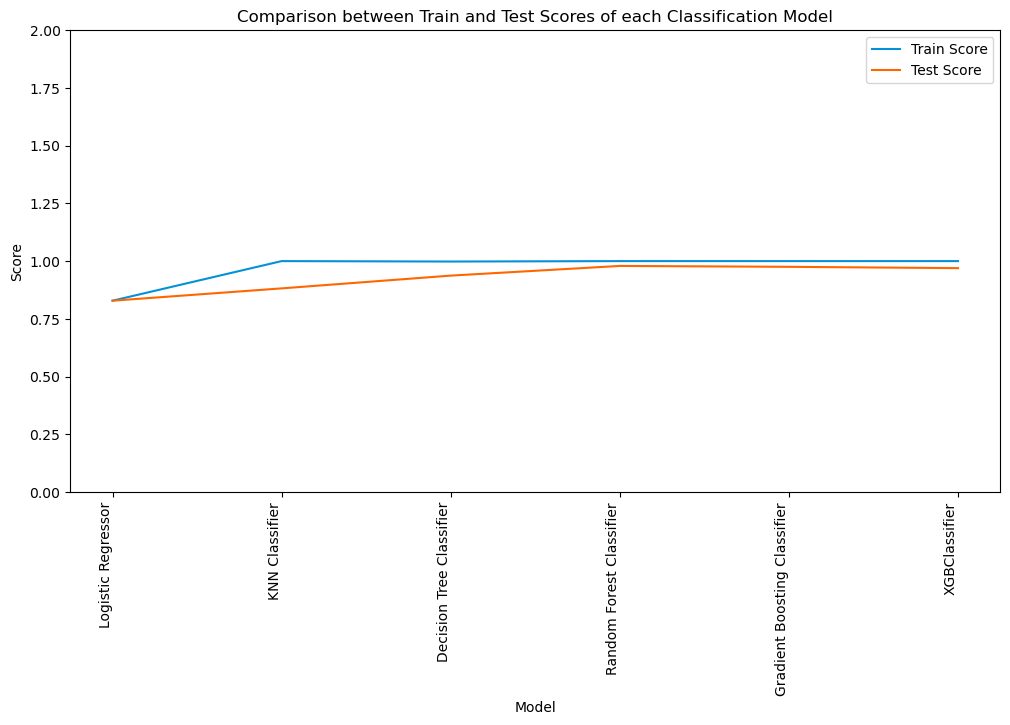

In [180]:
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrame
Model_Comparison_2 = pd.DataFrame({
    'Model': ['Logistic Regressor', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XGBClassifier'],
    'Train Score': [accuracy_LR, accuracy_knn_train, accuracy_decsT_train, accuracy_rf_train, accuracy_GBC_train, accuracy_XGB_train],
    'Test Score': [accuracy_LR, accuracy_knn, accuracy_decsT, accuracy_rf, accuracy_GBC, accuracy_XGB]
})

# Adjust index
Model_Comparison_2.index = Model_Comparison_2.index + 1

# Display the DataFrame
print(Model_Comparison_2)

# Plotting
model_names = Model_Comparison_2['Model'].tolist()
train_scores = Model_Comparison_2['Train Score'].tolist()
test_scores = Model_Comparison_2['Test Score'].tolist()

plt.figure(figsize=(12, 6))
plt.plot(model_names, train_scores, label='Train Score', color='#0590DA')
plt.plot(model_names, test_scores, label='Test Score', color='#FF6600')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison between Train and Test Scores of each Classification Model')
plt.ylim(0.0, 2.0)
plt.show()

# Creating a bar plot to visualize Accuracy scores for different algorithms

In [178]:
# Creating a list of Accuracy score for different algorithms
scores = [accuracy_LR, accuracy_knn, accuracy_decsT, accuracy_rf , accuracy_GBC, accuracy_XGB]

# List of algorithm names.
algorithms = ["Logistic Regression", "KNN Classifier", "Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "XGBClassifier"]

# Looping through each algorithm and printing its Accuracy Score.
for i in range(len(algorithms)) :
    
    print("The accuracy score achieved using "+ algorithms[i]+" is: "+str(scores[i])+"%")


The accuracy score achieved using Logistic Regression is: 0.8285714285714286%
The accuracy score achieved using KNN Classifier is: 0.8819047619047619%
The accuracy score achieved using Decision Tree Classifier is: 0.9371428571428572%
The accuracy score achieved using Random Forest Classifier is: 0.979047619047619%
The accuracy score achieved using Gradient Boosting Classifier is: 0.9752380952380952%
The accuracy score achieved using XGBClassifier is: 0.9695238095238096%


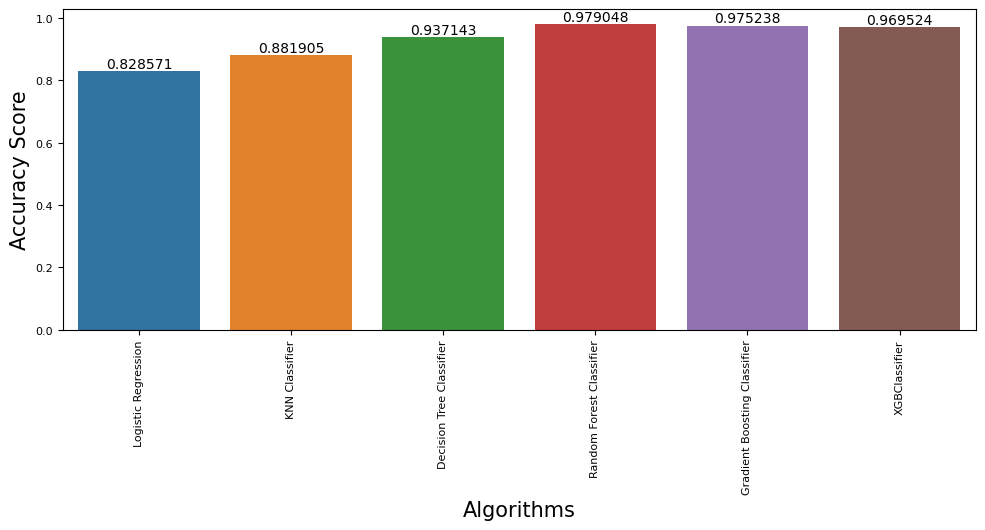

In [179]:
# Here, We are setting the figure size of the plot.
plt.figure(figsize=(10,4))

# Adding labels to the axes.
plt.xlabel("Algorithms", fontsize = 15)
plt.ylabel("Accuracy Score", fontsize = 15)

# Using seaborn to creat a bar plot.
ax = sns.barplot(x = algorithms, y = scores)

# Adding labels to the each bar in the plot.
for label in ax.containers:
    ax.bar_label(label)
    
# Ensuring tight layout for a clean presentation.
plt.tight_layout()

# it will rotate the x-tick labels by 90 degree for better readability.
plt.xticks(rotation = 90)

# Adjusting tick label font size for better readability.
plt.tick_params(labelsize = 8)

# It will display the plot.
plt.show()

# Summary Report on Business Problem and Model Evaluation:

**1. Summary Report on Business Problem and Model Evaluation:**

INX Future Inc is facing challenges with declining employee performance indexes, leading to concerns among the top management. To address this issue, a data science project was initiated to analyze employee data and identify underlying causes of performance issues. Various machine learning models were trained and evaluated to predict employee performance and provide insights for improvement.

The models were evaluated based on metrics such as Mean Squared Error, R-squared Score, Log Loss, AUC-ROC Score, Jaccard Score, and computational efficiency. Among the models tested, Random Forest Classifier performed the best, achieving the lowest Mean Squared Error, highest R-squared Score, and highest AUC-ROC Score.

**2. Business Insight and Recommendations:**

Based on the insights from the trained models, the following recommendations can be made to improve employee performance and address attrition:

- Identify and address department-wise performance variations to implement targeted improvement strategies.
- Determine the top three important factors affecting employee performance, such as job satisfaction, work-life balance, and training opportunities, and focus on enhancing these aspects.
- Utilize the trained model to predict employee performance based on various factors, allowing the company to make informed hiring decisions and allocate resources effectively.
- Implement measures to mitigate attrition by addressing underlying factors contributing to employee dissatisfaction, such as workload, career advancement opportunities, and compensation packages.


# Conclusion:

The data science project successfully analyzed employee data to identify factors influencing performance and provided actionable insights for improvement. By leveraging machine learning models, INX Future Inc can make data-driven decisions to enhance employee performance, attract top talent, and mitigate attrition.

# Challenges:

- Data quality: Ensuring the accuracy and completeness of employee data to derive meaningful insights.
- Model interpretability: Understanding the underlying factors driving model predictions and translating them into actionable recommendations.
- Implementation: Overcoming organizational barriers and resistance to change when implementing recommended strategies based on data-driven insights.

**Overall, the data science project conducted at INX Future Inc aimed to address declining employee performance indexes and concerns among the management. By analyzing employee data, the project sought to identify underlying causes of performance issues and provide actionable insights for improvement. Various machine learning models were trained and evaluated to predict employee performance and offer recommendations to enhance performance and reduce attrition.**

**The models were assessed based on several metrics, including Mean Squared Error, R-squared Score, Log Loss, AUC-ROC Score, Jaccard Score, and computational efficiency. Among the models tested, the Random Forest Classifier performed the best, demonstrating superior predictive performance and computational efficiency.**

**Based on the insights from the trained models, recommendations were made to improve employee performance, such as addressing department-wise variations, identifying key factors influencing performance, leveraging predictive models for hiring decisions, and implementing measures to mitigate attrition.**

**In conclusion, the data science project provided valuable insights into employee performance and attrition, empowering INX Future Inc to make data-driven decisions and implement targeted strategies for improvement. However, challenges such as data quality, model interpretability, and implementation barriers may need to be addressed to ensure the successful adoption of the recommendations.**